<a href="https://colab.research.google.com/github/DeepthiVReddy/Competitive-Economic-Market-Analysis-of-Soft-Drink-Sales/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load original datasets (correct file names)
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
causal_data = pd.read_csv("causal_data.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
coupon = pd.read_csv("coupon.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product = pd.read_csv("product.csv")
transaction_data = pd.read_csv("transaction_data.csv")

# Display basic information and first few rows of each dataset
datasets = {
    "campaign_desc": campaign_desc,
    "campaign_table": campaign_table,
    "causal_data": causal_data,
    "coupon_redempt": coupon_redempt,
    "coupon": coupon,
    "hh_demographic": hh_demographic,
    "product": product,
    "transaction_data": transaction_data
}

for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(df.info())
    print(df.head())



Dataset: campaign_desc
Shape: (30, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None
  DESCRIPTION  CAMPAIGN  START_DAY  END_DAY
0       TypeB        24        659      719
1       TypeC        15        547      708
2       TypeB        25        659      691
3       TypeC        20        615      685
4       TypeB        23        646      684

Dataset: campaign_table
Shape: (7208, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_ke

In [ ]:
# Check for key relationships in the datasets
print("Key Columns in Datasets:")

relationships = {
    "campaign_desc": campaign_desc.columns,
    "campaign_table": campaign_table.columns,
    "causal_data": causal_data.columns,
    "coupon_redempt": coupon_redempt.columns,
    "coupon": coupon.columns,
    "hh_demographic": hh_demographic.columns,
    "product": product.columns,
    "transaction_data": transaction_data.columns
}

for name, cols in relationships.items():
    print(f"{name}: {cols}")


Key Columns in Datasets:
campaign_desc: Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], dtype='object')
campaign_table: Index(['DESCRIPTION', 'household_key', 'CAMPAIGN'], dtype='object')
causal_data: Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer'], dtype='object')
coupon_redempt: Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object')
coupon: Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')
hh_demographic: Index(['classification_1', 'classification_2', 'classification_3',
       'HOMEOWNER_DESC', 'classification_5', 'classification_4',
       'KID_CATEGORY_DESC', 'household_key'],
      dtype='object')
product: Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')
transaction_data: Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
   

Top Manufacturers by Sales:
MANUFACTURER
69      2178431.70
2        346816.96
764      165212.31
103      119346.22
1208     114565.07
Name: SALES_VALUE, dtype: float64


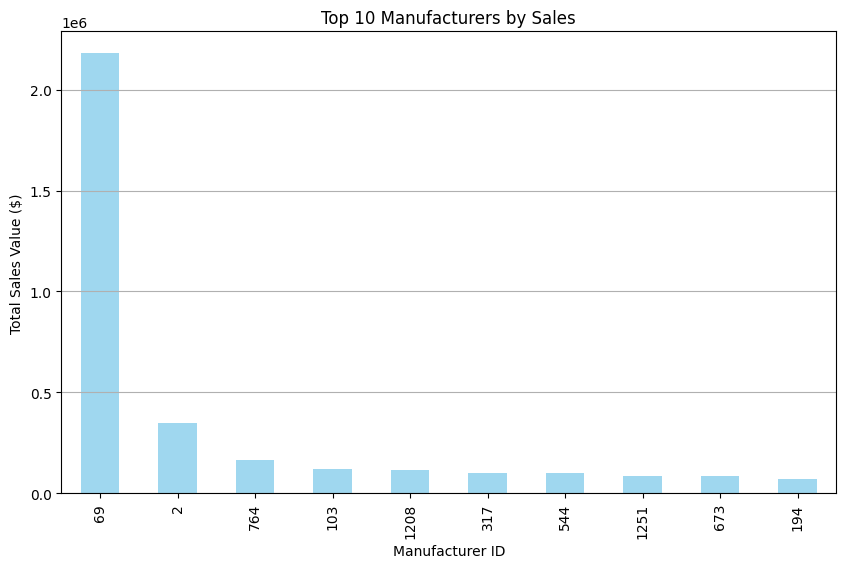

In [ ]:
# Merge transaction_data with product to include product details
transaction_product = pd.merge(transaction_data, product, on="PRODUCT_ID", how="left")

# Aggregate sales by manufacturer
manufacturer_sales = transaction_product.groupby("MANUFACTURER")["SALES_VALUE"].sum().sort_values(ascending=False)

# Display top manufacturers
print("Top Manufacturers by Sales:")
print(manufacturer_sales.head())

# Plot sales of top manufacturers
import matplotlib.pyplot as plt

manufacturer_sales.head(10).plot(kind="bar", figsize=(10, 6), color="skyblue", alpha=0.8)
plt.title("Top 10 Manufacturers by Sales")
plt.xlabel("Manufacturer ID")
plt.ylabel("Total Sales Value ($)")
plt.grid(axis="y")
plt.show()


Top Categories by Sales:
COMMODITY_DESC
COUPON/MISC ITEMS      639878.56
SOFT DRINKS            327647.30
BEEF                   312103.22
FLUID MILK PRODUCTS    205356.05
CHEESE                 189528.18
Name: SALES_VALUE, dtype: float64


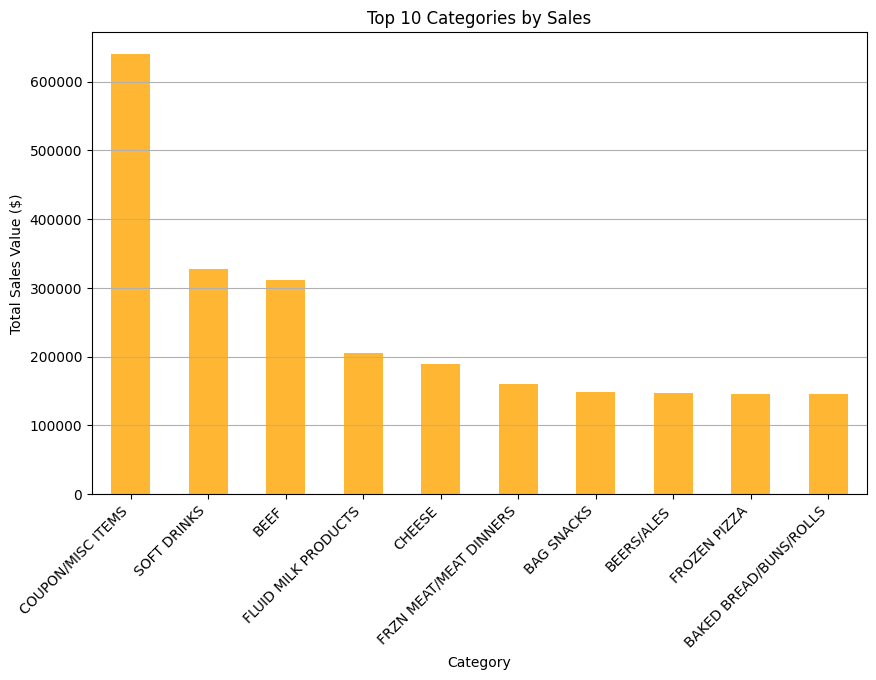

In [ ]:
# Aggregate sales by category
category_sales = transaction_product.groupby("COMMODITY_DESC")["SALES_VALUE"].sum().sort_values(ascending=False)

# Display top categories by sales
print("Top Categories by Sales:")
print(category_sales.head())

# Plot sales of top categories
import matplotlib.pyplot as plt

category_sales.head(10).plot(kind="bar", figsize=(10, 6), color="orange", alpha=0.8)
plt.title("Top 10 Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales Value ($)")
plt.grid(axis="y")
plt.xticks(rotation=45, ha="right")
plt.show()


Top Industries by Sales:
DEPARTMENT
GROCERY      4093814.14
DRUG GM      1055358.03
PRODUCE       557452.11
MEAT          548786.81
KIOSK-GAS     544222.28
Name: SALES_VALUE, dtype: float64


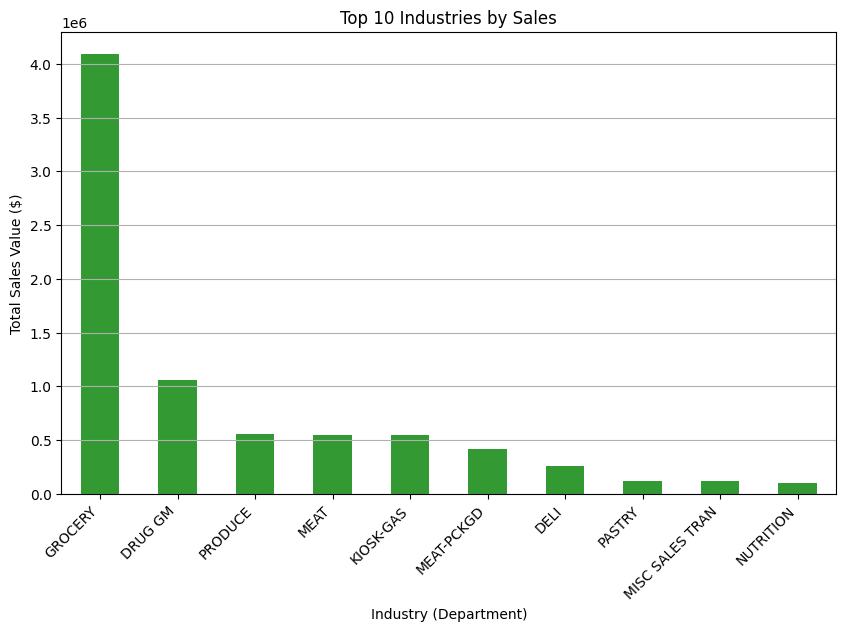

In [ ]:
# Aggregate sales by department (industry)
industry_sales = transaction_product.groupby("DEPARTMENT")["SALES_VALUE"].sum().sort_values(ascending=False)

# Display top industries by sales
print("Top Industries by Sales:")
print(industry_sales.head())

# Plot sales of top industries
import matplotlib.pyplot as plt

industry_sales.head(10).plot(kind="bar", figsize=(10, 6), color="green", alpha=0.8)
plt.title("Top 10 Industries by Sales")
plt.xlabel("Industry (Department)")
plt.ylabel("Total Sales Value ($)")
plt.grid(axis="y")
plt.xticks(rotation=45, ha="right")
plt.show()


Top Industries by Revenue:
DEPARTMENT
GROCERY      3253484.69
DRUG GM       943628.55
KIOSK-GAS     526996.84
PRODUCE       488664.02
MEAT          372037.53
Name: REVENUE, dtype: float64


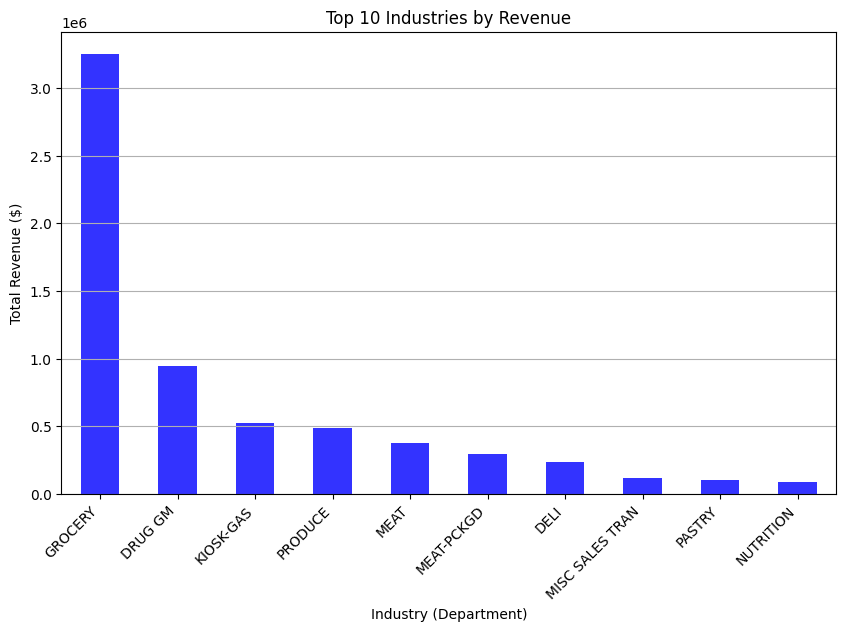

In [ ]:
# Create a Revenue column
transaction_product["REVENUE"] = (
    transaction_product["SALES_VALUE"]
    + transaction_product["RETAIL_DISC"]
    + transaction_product["COUPON_DISC"]
)

# Aggregate revenue by department (industry)
industry_revenue = transaction_product.groupby("DEPARTMENT")["REVENUE"].sum().sort_values(ascending=False)

# Display top industries by revenue
print("Top Industries by Revenue:")
print(industry_revenue.head())

# Plot revenue of top industries
import matplotlib.pyplot as plt

industry_revenue.head(10).plot(kind="bar", figsize=(10, 6), color="blue", alpha=0.8)
plt.title("Top 10 Industries by Revenue")
plt.xlabel("Industry (Department)")
plt.ylabel("Total Revenue ($)")
plt.grid(axis="y")
plt.xticks(rotation=45, ha="right")
plt.show()


Top Manufacturers in Grocery by Sales:
MANUFACTURER
69      1091687.90
103      119292.84
1208     114562.29
764      103698.73
317      102408.42
Name: SALES_VALUE, dtype: float64


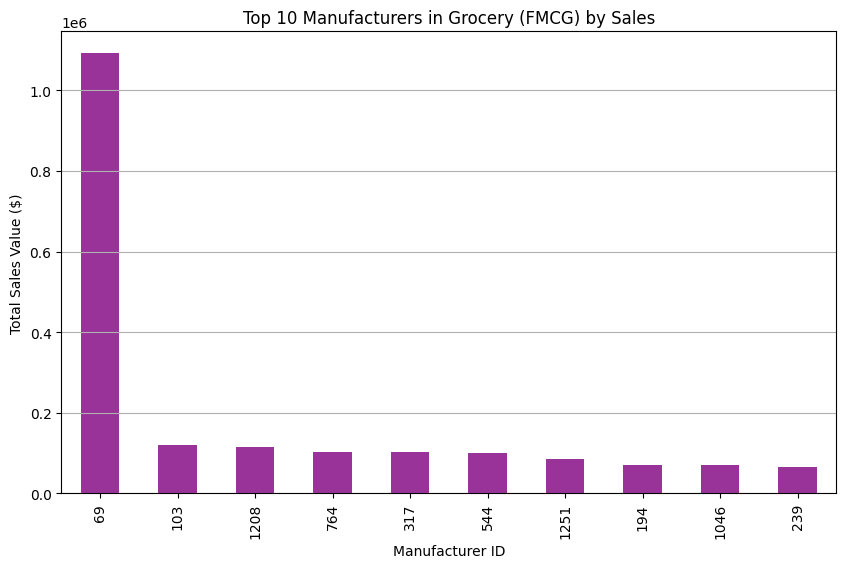

In [ ]:
# Filter data for the Grocery department
grocery_data = transaction_product[transaction_product["DEPARTMENT"] == "GROCERY"]

# Aggregate sales by manufacturer
grocery_manufacturer_sales = grocery_data.groupby("MANUFACTURER")["SALES_VALUE"].sum().sort_values(ascending=False)

# Display top manufacturers in Grocery
print("Top Manufacturers in Grocery by Sales:")
print(grocery_manufacturer_sales.head())

# Plot sales of top manufacturers in Grocery
import matplotlib.pyplot as plt

grocery_manufacturer_sales.head(10).plot(kind="bar", figsize=(10, 6), color="purple", alpha=0.8)
plt.title("Top 10 Manufacturers in Grocery (FMCG) by Sales")
plt.xlabel("Manufacturer ID")
plt.ylabel("Total Sales Value ($)")
plt.grid(axis="y")
plt.show()


<ipython-input-15-b110d434b7d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grocery_data["REVENUE"] = (


Top Manufacturers in Grocery by Revenue:
MANUFACTURER
69     852233.16
764     89207.16
544     86490.23
317     78967.08
103     74834.73
Name: REVENUE, dtype: float64


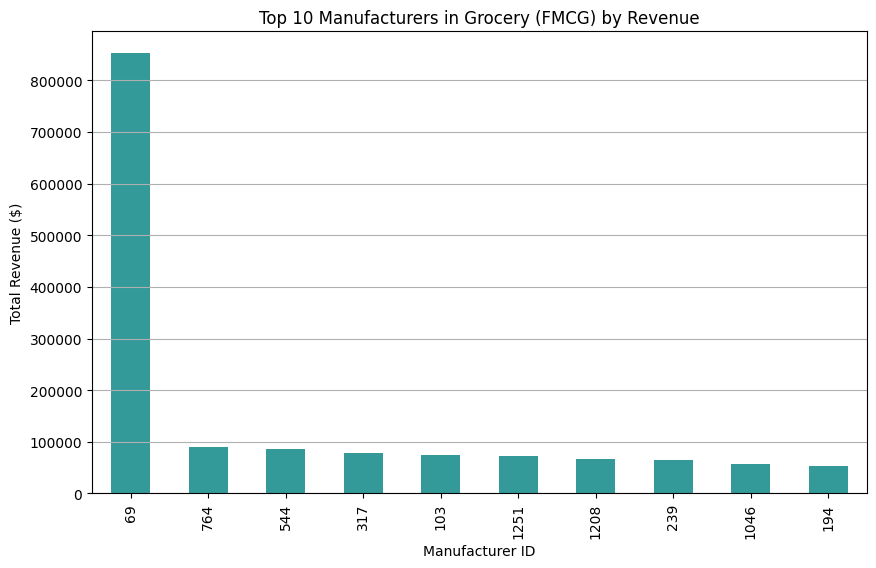

In [ ]:
# Calculate revenue for grocery data
grocery_data["REVENUE"] = (
    grocery_data["SALES_VALUE"]
    + grocery_data["RETAIL_DISC"]
    + grocery_data["COUPON_DISC"]
)

# Aggregate revenue by manufacturer
grocery_manufacturer_revenue = grocery_data.groupby("MANUFACTURER")["REVENUE"].sum().sort_values(ascending=False)

# Display top manufacturers in Grocery by revenue
print("Top Manufacturers in Grocery by Revenue:")
print(grocery_manufacturer_revenue.head())

# Plot revenue of top manufacturers in Grocery
import matplotlib.pyplot as plt

grocery_manufacturer_revenue.head(10).plot(kind="bar", figsize=(10, 6), color="teal", alpha=0.8)
plt.title("Top 10 Manufacturers in Grocery (FMCG) by Revenue")
plt.xlabel("Manufacturer ID")
plt.ylabel("Total Revenue ($)")
plt.grid(axis="y")
plt.show()


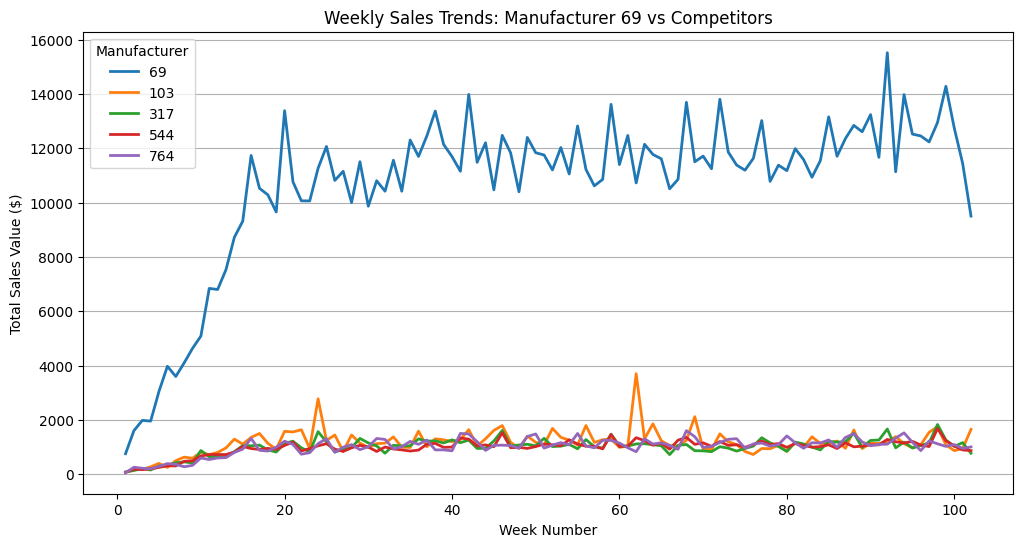

In [ ]:
# Filter data for Manufacturer 69 and competitors
focal_and_competitors = [69, 764, 544, 317, 103]
filtered_grocery_data = grocery_data[grocery_data["MANUFACTURER"].isin(focal_and_competitors)]

# Aggregate weekly sales by manufacturer
weekly_sales = filtered_grocery_data.groupby(["WEEK_NO", "MANUFACTURER"])["SALES_VALUE"].sum().unstack()

# Plot weekly sales trends
import matplotlib.pyplot as plt

weekly_sales.plot(figsize=(12, 6), linewidth=2)
plt.title("Weekly Sales Trends: Manufacturer 69 vs Competitors")
plt.xlabel("Week Number")
plt.ylabel("Total Sales Value ($)")
plt.legend(title="Manufacturer")
plt.grid(axis="y")
plt.show()


Pricing and Sales Data by Manufacturer (After Fix):
   MANUFACTURER  Effective_Price  SALES_VALUE
0            69         1.514217   1091687.89
1           103         2.315952    119290.75
2           317         2.140053    102408.42
3           544         1.999404    100251.87
4           764         4.553948    103698.73


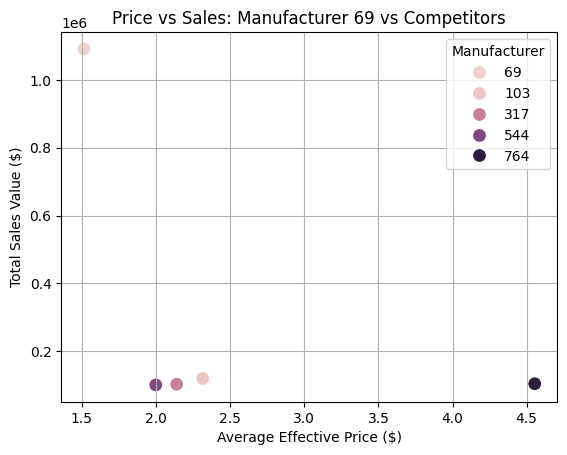

In [ ]:
# Filter out rows with zero quantity
filtered_grocery_data = filtered_grocery_data[filtered_grocery_data["QUANTITY"] > 0]

# Recalculate effective price
filtered_grocery_data["Effective_Price"] = filtered_grocery_data["SALES_VALUE"] / filtered_grocery_data["QUANTITY"]

# Aggregate average price and total sales by manufacturer
price_sales_data = filtered_grocery_data.groupby("MANUFACTURER").agg({
    "Effective_Price": "mean",
    "SALES_VALUE": "sum"
}).reset_index()

# Display pricing and sales data
print("Pricing and Sales Data by Manufacturer (After Fix):")
print(price_sales_data)

# Visualize price vs sales
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=price_sales_data, x="Effective_Price", y="SALES_VALUE", hue="MANUFACTURER", s=100)
plt.title("Price vs Sales: Manufacturer 69 vs Competitors")
plt.xlabel("Average Effective Price ($)")
plt.ylabel("Total Sales Value ($)")
plt.grid(True)
plt.legend(title="Manufacturer")
plt.show()


Campaign Impact Data by Manufacturer:
   MANUFACTURER  Total_Campaign_Sales  Number_of_Campaigns
0            69            5962205.21                   30
1           103             635221.45                   30
2           317             560830.55                   30
3           544             559906.06                   30
4           764             604557.65                   30


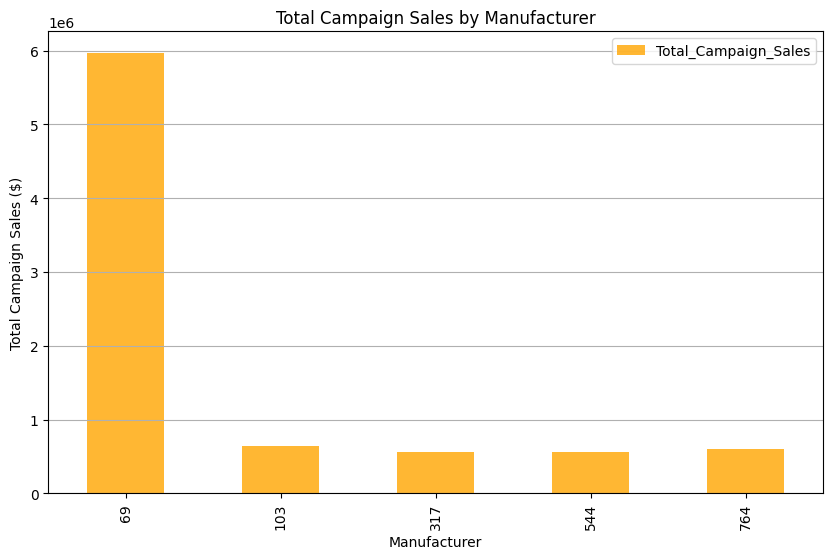

In [ ]:
# Merge transaction_data with campaign_table and campaign_desc
campaign_merged = pd.merge(filtered_grocery_data, campaign_table, on="household_key", how="left")
campaign_merged = pd.merge(campaign_merged, campaign_desc, on="CAMPAIGN", how="left")

# Aggregate campaign sales by manufacturer
campaign_impact = campaign_merged.groupby("MANUFACTURER").agg({
    "SALES_VALUE": "sum",
    "CAMPAIGN": "nunique"
}).reset_index()
campaign_impact.rename(columns={"SALES_VALUE": "Total_Campaign_Sales", "CAMPAIGN": "Number_of_Campaigns"}, inplace=True)

# Display campaign impact data
print("Campaign Impact Data by Manufacturer:")
print(campaign_impact)

# Visualize campaign impact
import matplotlib.pyplot as plt

campaign_impact.plot(
    kind="bar",
    x="MANUFACTURER",
    y="Total_Campaign_Sales",
    figsize=(10, 6),
    color="orange",
    alpha=0.8
)
plt.title("Total Campaign Sales by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Total Campaign Sales ($)")
plt.grid(axis="y")
plt.show()


<ipython-input-22-7ef67a7c75c5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


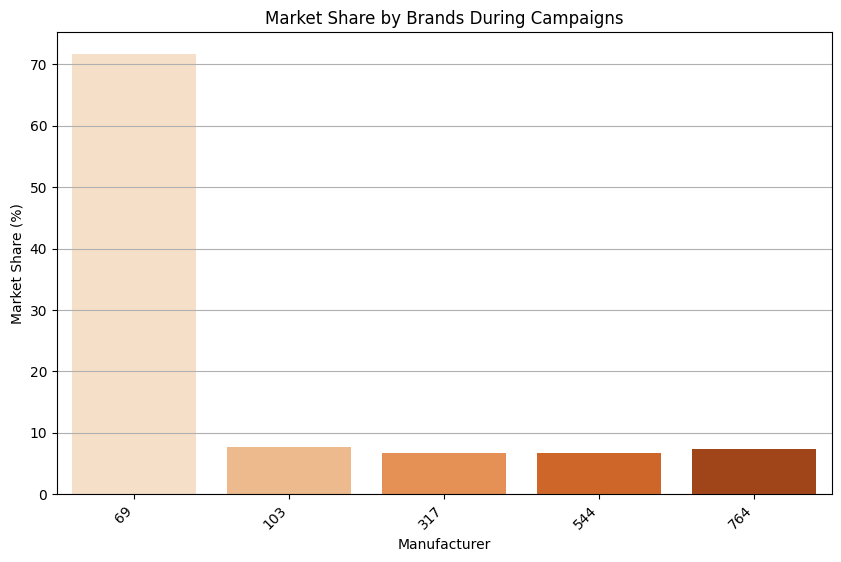

<ipython-input-22-7ef67a7c75c5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


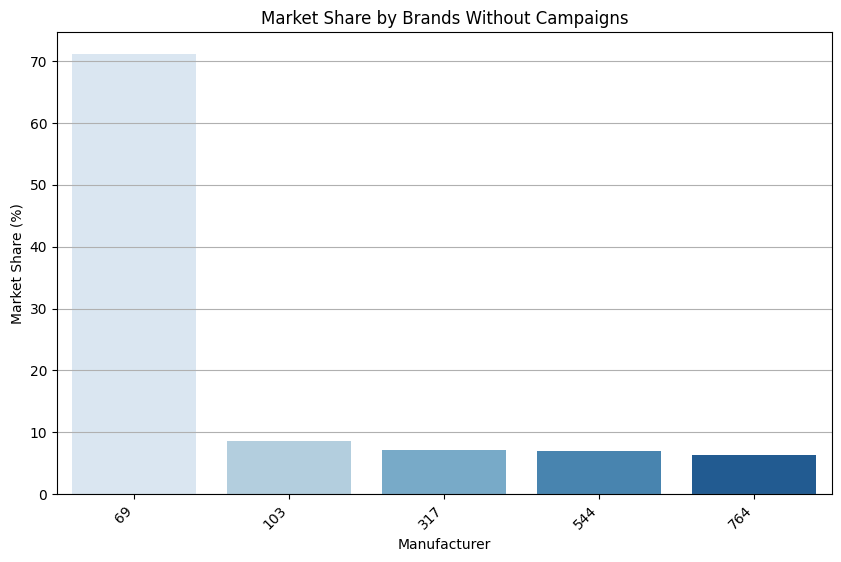

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Manufacturer IDs are treated as categorical labels
sales_ratios_comparison["MANUFACTURER"] = sales_ratios_comparison["MANUFACTURER"].astype(str)

# Plot campaign sales ratios
plt.figure(figsize=(10, 6))
sns.barplot(
    x="MANUFACTURER",
    y="Campaign_Sales_Ratio (%)",
    data=sales_ratios_comparison,
    palette="Oranges",
    width=0.8
)
plt.title("Market Share by Brands During Campaigns")
plt.xlabel("Manufacturer")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()

# Plot non-campaign sales ratios
plt.figure(figsize=(10, 6))
sns.barplot(
    x="MANUFACTURER",
    y="Non_Campaign_Sales_Ratio (%)",
    data=sales_ratios_comparison,
    palette="Blues",
    width=0.8
)
plt.title("Market Share by Brands Without Campaigns")
plt.xlabel("Manufacturer")
plt.ylabel("Market Share (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()


Net Impact of Campaigns by Manufacturer:
   MANUFACTURER  Avg_Weekly_Campaign_Sales  Avg_Weekly_Non_Campaign_Sales  \
0            69               57191.733922                    1261.258333   
1           103                6076.645000                     151.016275   
2           317                5370.413137                     127.925588   
3           544                5366.918431                     122.356667   
4           764                5816.139804                     110.895980   

   Net_Impact (%)  
0     4434.498002  
1     3923.834530  
2     4098.075781  
3     4286.290161  
4     5144.680450  


<ipython-input-24-148f3ab1dee4>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


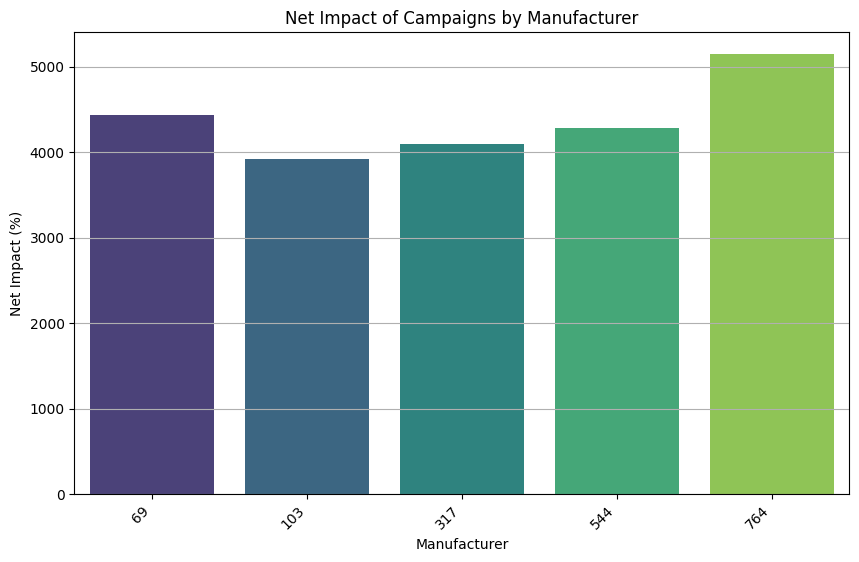

In [ ]:
# Aggregate weekly sales during campaigns and non-campaign periods
campaign_weekly_sales = campaign_sales.groupby(["MANUFACTURER", "WEEK_NO"])["SALES_VALUE"].sum().reset_index()
non_campaign_weekly_sales = non_campaign_sales.groupby(["MANUFACTURER", "WEEK_NO"])["SALES_VALUE"].sum().reset_index()

# Calculate average weekly sales during campaigns
avg_campaign_sales = campaign_weekly_sales.groupby("MANUFACTURER")["SALES_VALUE"].mean().reset_index()
avg_campaign_sales.rename(columns={"SALES_VALUE": "Avg_Weekly_Campaign_Sales"}, inplace=True)

# Calculate average weekly sales during non-campaign periods
avg_non_campaign_sales = non_campaign_weekly_sales.groupby("MANUFACTURER")["SALES_VALUE"].mean().reset_index()
avg_non_campaign_sales.rename(columns={"SALES_VALUE": "Avg_Weekly_Non_Campaign_Sales"}, inplace=True)

# Merge the two dataframes
net_impact = pd.merge(avg_campaign_sales, avg_non_campaign_sales, on="MANUFACTURER", how="outer").fillna(0)

# Calculate net impact percentage
net_impact["Net_Impact (%)"] = (
    (net_impact["Avg_Weekly_Campaign_Sales"] - net_impact["Avg_Weekly_Non_Campaign_Sales"])
    / net_impact["Avg_Weekly_Non_Campaign_Sales"]
) * 100

# Display net impact data
print("Net Impact of Campaigns by Manufacturer:")
print(net_impact)

# Visualize net impact
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x="MANUFACTURER",
    y="Net_Impact (%)",
    data=net_impact,
    palette="viridis",
    width=0.8
)
plt.title("Net Impact of Campaigns by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Net Impact (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.show()


<ipython-input-26-81d1d82c2cee>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m69_demographics, x="classification_1", y="SALES_VALUE", palette="viridis")


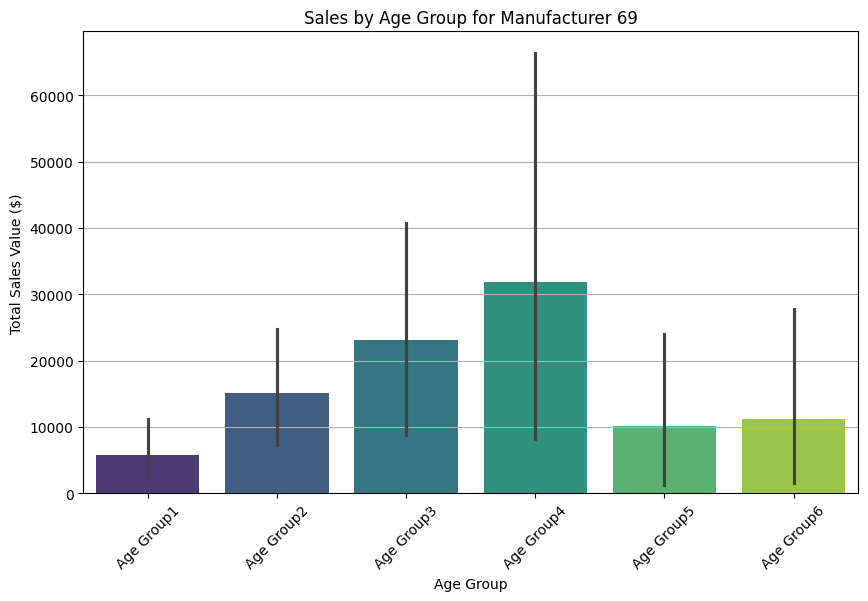

<ipython-input-26-81d1d82c2cee>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m69_demographics, x="HOMEOWNER_DESC", y="SALES_VALUE", palette="coolwarm")


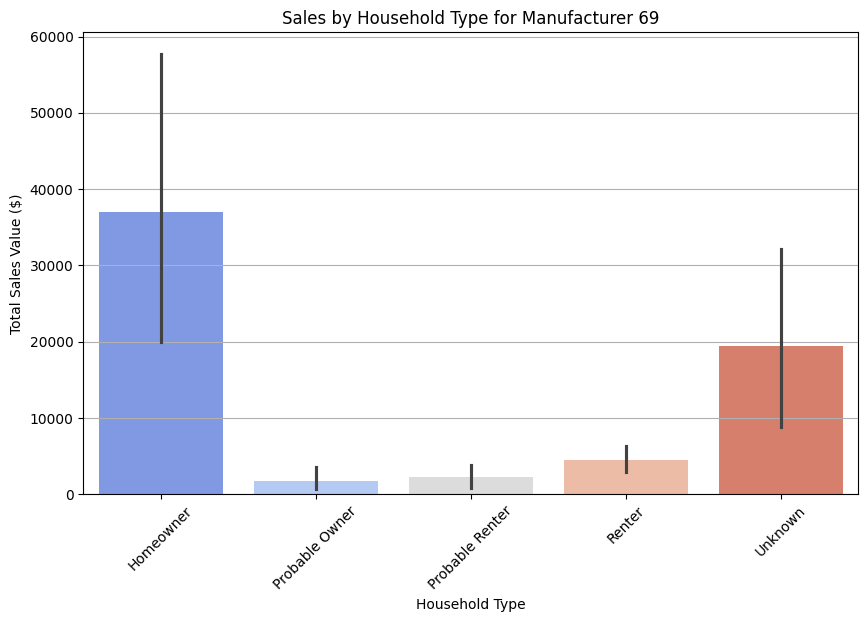

<ipython-input-26-81d1d82c2cee>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=m69_demographics, x="KID_CATEGORY_DESC", y="SALES_VALUE", palette="cubehelix")


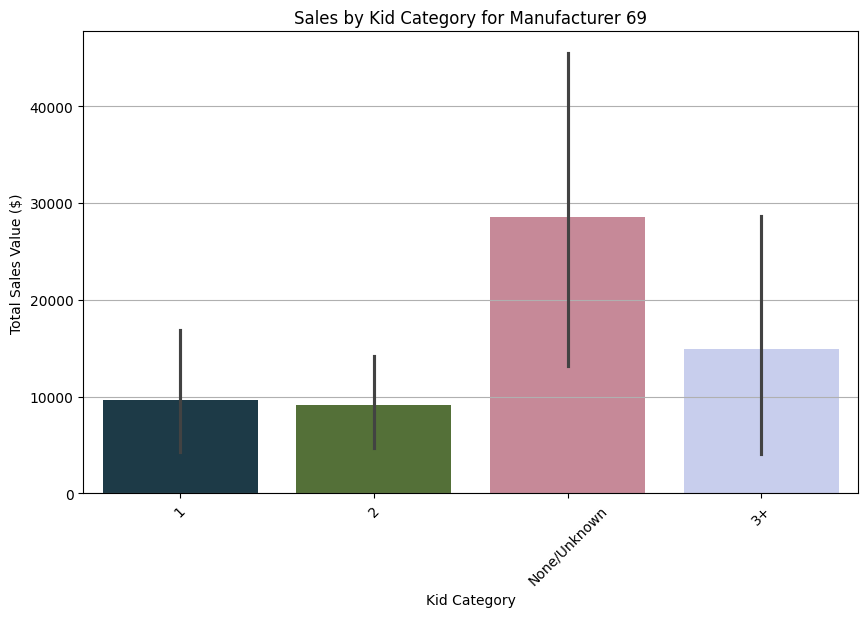

In [ ]:
# Re-merge transaction data with product data to include MANUFACTURER information
transaction_product_merged = pd.merge(transaction_data, product, on="PRODUCT_ID", how="left")

# Merge with demographic data
demographic_merged = pd.merge(transaction_product_merged, hh_demographic, on="household_key", how="left")

# Filter data for Manufacturer 69 and competitors
demographic_filtered = demographic_merged[demographic_merged["MANUFACTURER"].isin([69, 764, 544, 317, 103])]

# Aggregate sales by demographic categories for Manufacturer 69
demographic_analysis = demographic_filtered.groupby(
    ["MANUFACTURER", "classification_1", "HOMEOWNER_DESC", "KID_CATEGORY_DESC"]
)["SALES_VALUE"].sum().reset_index()

# Separate Manufacturer 69 data
m69_demographics = demographic_analysis[demographic_analysis["MANUFACTURER"] == 69]

# Visualize Sales by Age Group for Manufacturer 69
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=m69_demographics, x="classification_1", y="SALES_VALUE", palette="viridis")
plt.title("Sales by Age Group for Manufacturer 69")
plt.xlabel("Age Group")
plt.ylabel("Total Sales Value ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Visualize Sales by Household Type for Manufacturer 69
plt.figure(figsize=(10, 6))
sns.barplot(data=m69_demographics, x="HOMEOWNER_DESC", y="SALES_VALUE", palette="coolwarm")
plt.title("Sales by Household Type for Manufacturer 69")
plt.xlabel("Household Type")
plt.ylabel("Total Sales Value ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Visualize Sales by Kid Category for Manufacturer 69
plt.figure(figsize=(10, 6))
sns.barplot(data=m69_demographics, x="KID_CATEGORY_DESC", y="SALES_VALUE", palette="cubehelix")
plt.title("Sales by Kid Category for Manufacturer 69")
plt.xlabel("Kid Category")
plt.ylabel("Total Sales Value ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

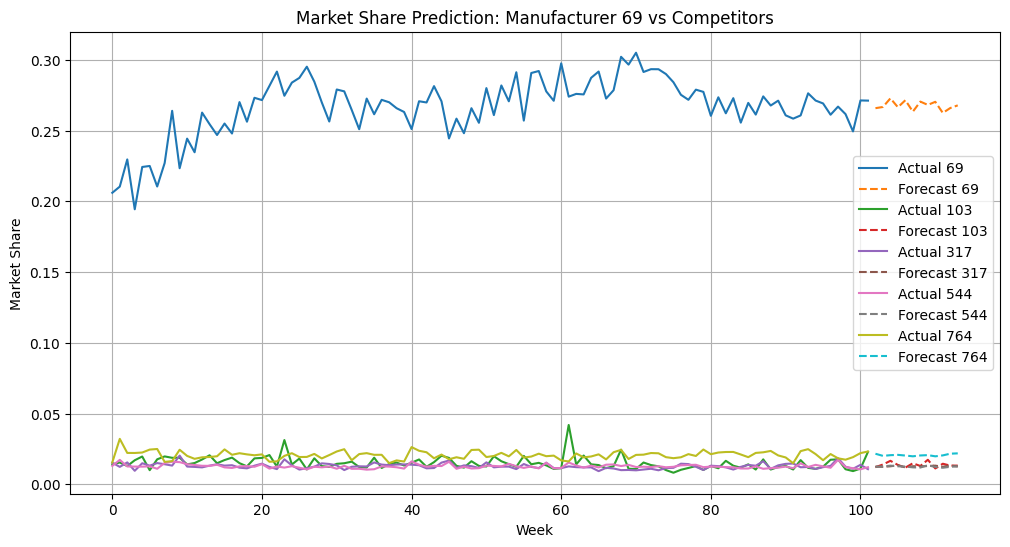

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Aggregate weekly sales for each manufacturer
weekly_sales = transaction_product_merged.groupby(["WEEK_NO", "MANUFACTURER"])["SALES_VALUE"].sum().unstack()

# Calculate weekly market share
weekly_market_share = weekly_sales.div(weekly_sales.sum(axis=1), axis=0)

# Forecast market share for Manufacturer 69 and competitors
forecast_results = {}
for manufacturer in [69, 103, 317, 544, 764]:
    data = weekly_market_share[manufacturer].dropna()
    model = ExponentialSmoothing(data, seasonal="add", seasonal_periods=12)
    fit = model.fit()
    forecast = fit.forecast(12)
    forecast_results[manufacturer] = forecast

# Visualize actual and forecasted market share
plt.figure(figsize=(12, 6))
for manufacturer, forecast in forecast_results.items():
    plt.plot(range(len(weekly_market_share)), weekly_market_share[manufacturer], label=f"Actual {manufacturer}")
    plt.plot(range(len(weekly_market_share), len(weekly_market_share) + len(forecast)), forecast, linestyle="--", label=f"Forecast {manufacturer}")

plt.title("Market Share Prediction: Manufacturer 69 vs Competitors")
plt.xlabel("Week")
plt.ylabel("Market Share")
plt.legend()
plt.grid()
plt.show()


<ipython-input-30-40c4c921408d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_product_merged["Effective_Price"] = transaction_product_merged["SALES_VALUE"] / transaction_product_merged["QUANTITY"]


R-squared: -0.04
Mean Squared Error: 45288241.08

Price Elasticity Coefficients:
  Competitor  Coefficient
0  Price_103   629.473429
1  Price_317 -4077.013324
2  Price_544  3285.585144
3  Price_764   914.236916


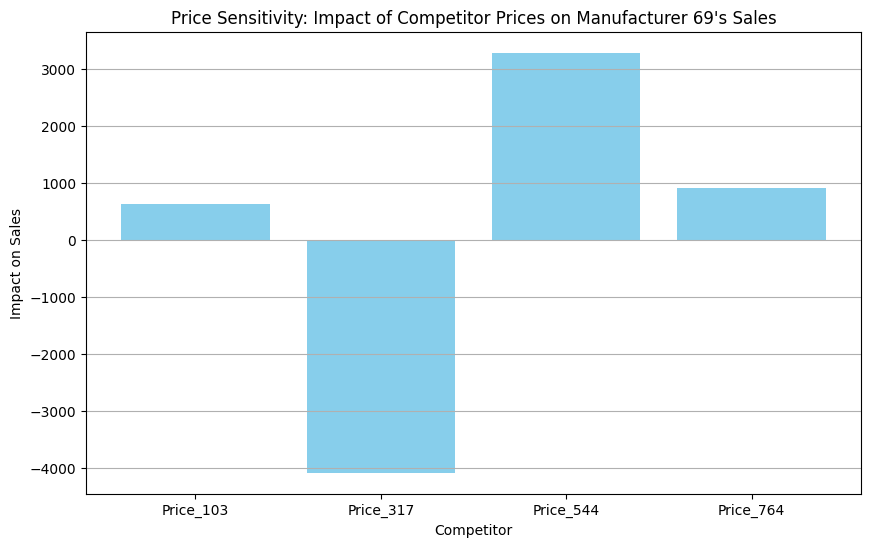

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Calculate Effective Price
transaction_product_merged["Effective_Price"] = transaction_product_merged["SALES_VALUE"] / transaction_product_merged["QUANTITY"]

# Handle invalid values
transaction_product_merged = transaction_product_merged.replace([np.inf, -np.inf], np.nan)  # Replace infinity with NaN
transaction_product_merged = transaction_product_merged.dropna(subset=["Effective_Price"])  # Drop rows with NaN in Effective_Price

# Step 2: Aggregate weekly data
price_sales_data = transaction_product_merged.groupby(["WEEK_NO", "MANUFACTURER"]).agg(
    Effective_Price=("Effective_Price", "mean"),
    SALES_VALUE=("SALES_VALUE", "sum")
).unstack()

# Step 3: Prepare data for Manufacturer 69 and competitors
manufacturer_69_data = price_sales_data["SALES_VALUE"][69].reset_index(drop=True)
competitor_data = price_sales_data["Effective_Price"][[103, 317, 544, 764]].reset_index(drop=True)

# Combine data
data = pd.concat([manufacturer_69_data, competitor_data], axis=1)
data.columns = ["Sales_69", "Price_103", "Price_317", "Price_544", "Price_764"]

# Drop rows with missing values
data = data.dropna()

# Step 4: Split data into features and target
X = data[["Price_103", "Price_317", "Price_544", "Price_764"]]
y = data["Sales_69"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Display coefficients
coef_df = pd.DataFrame({"Competitor": X.columns, "Coefficient": model.coef_})
print("\nPrice Elasticity Coefficients:")
print(coef_df)

# Step 8: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(coef_df["Competitor"], coef_df["Coefficient"], color="skyblue")
plt.title("Price Sensitivity: Impact of Competitor Prices on Manufacturer 69's Sales")
plt.xlabel("Competitor")
plt.ylabel("Impact on Sales")
plt.grid(axis="y")
plt.show()


R-squared: 0.59
Mean Squared Error: 5957528.34

Feature Importance:
           Feature  Importance
3    Mailer_Active    0.603901
2   Display_Active    0.160535
1  Campaign_Active    0.153541
0  Effective_Price    0.082023


<ipython-input-3-36fc792281cf>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")


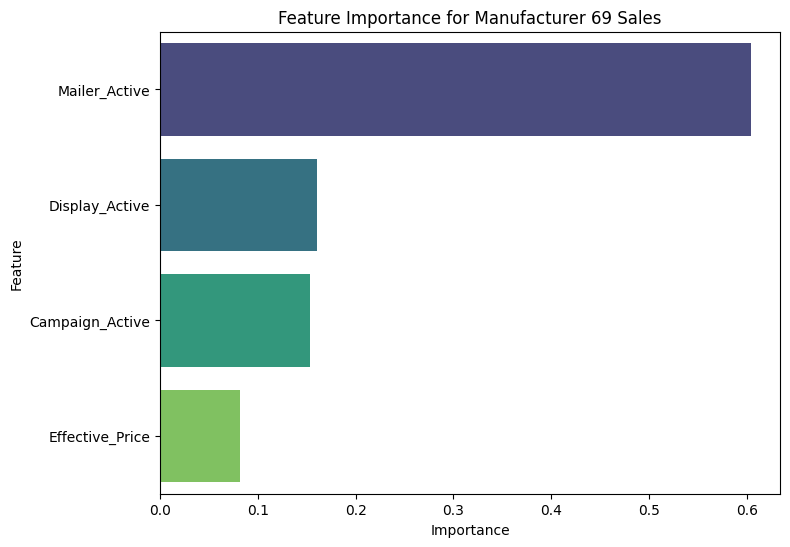

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Sample Data to Avoid Memory Issues
transaction_sample = transaction_data.sample(frac=0.1, random_state=42)

# Step 2: Merge Campaign Data
transaction_campaign_merged = pd.merge(transaction_sample, campaign_table, on=["household_key"], how="left")
transaction_campaign_merged["Campaign_Active"] = transaction_campaign_merged["CAMPAIGN"].notna().astype(int)

# Step 3: Merge Demographics
transaction_demo_merged = pd.merge(transaction_campaign_merged, hh_demographic, on=["household_key"], how="left")

# Step 4: Merge with Product and Causal Data
transaction_full_merged = pd.merge(transaction_demo_merged, product, on=["PRODUCT_ID"], how="left")
transaction_full_merged = pd.merge(transaction_full_merged, causal_data, on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"], how="left")

# Step 5: Calculate Effective Price
transaction_full_merged["Effective_Price"] = transaction_full_merged["SALES_VALUE"] / transaction_full_merged["QUANTITY"]
transaction_full_merged = transaction_full_merged.replace([np.inf, -np.inf], np.nan).dropna(subset=["Effective_Price"])

# Step 6: Aggregate Features for Weekly Analysis
aggregated_data = transaction_full_merged.groupby(["WEEK_NO", "MANUFACTURER"]).agg(
    Effective_Price=("Effective_Price", "mean"),
    Campaign_Active=("Campaign_Active", "mean"),
    Display_Active=("display", lambda x: (x == "1").mean()),
    Mailer_Active=("mailer", lambda x: (x == "A").mean()),
    SALES_VALUE=("SALES_VALUE", "sum")
).reset_index()

# Step 7: Filter Data for Manufacturer 69
manufacturer_69_data = aggregated_data[aggregated_data["MANUFACTURER"] == 69]

# Step 8: Prepare Dataset
features = ["Effective_Price", "Campaign_Active", "Display_Active", "Mailer_Active"]
X = manufacturer_69_data[features]
y = manufacturer_69_data["SALES_VALUE"]

# Drop rows with missing values
X = X.fillna(0)
y = y.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predict and Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Step 11: Feature Importance
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Step 12: Visualize Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Manufacturer 69 Sales")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Manufacturer: 69
R-squared: 0.59
Mean Squared Error: 5957528.34
Feature Importance:
           Feature  Importance
3    Mailer_Active    0.603901
2   Display_Active    0.160535
1  Campaign_Active    0.153541
0  Effective_Price    0.082023


Manufacturer: 103
R-squared: 0.03
Mean Squared Error: 40235.14
Feature Importance:
           Feature  Importance
1  Campaign_Active    0.356693
2   Display_Active    0.299519
0  Effective_Price    0.252499
3    Mailer_Active    0.091289


Manufacturer: 317
R-squared: 0.05
Mean Squared Error: 47190.41
Feature Importance:
           Feature  Importance
1  Campaign_Active    0.376539
0  Effective_Price    0.368566
3    Mailer_Active    0.244909
2   Display_Active    0.009986


Manufacturer: 544
R-squared: 0.26
Mean Squared Error: 48795.30
Feature Importance:
           Feature  Importance
1  Campaign_Active    0.565088
0  Effective_Price    0.253471
2   Display_Active    0.095057
3    Mailer_Active    0.086383


Manufacturer: 764
R-squared: 0.29
Mean 

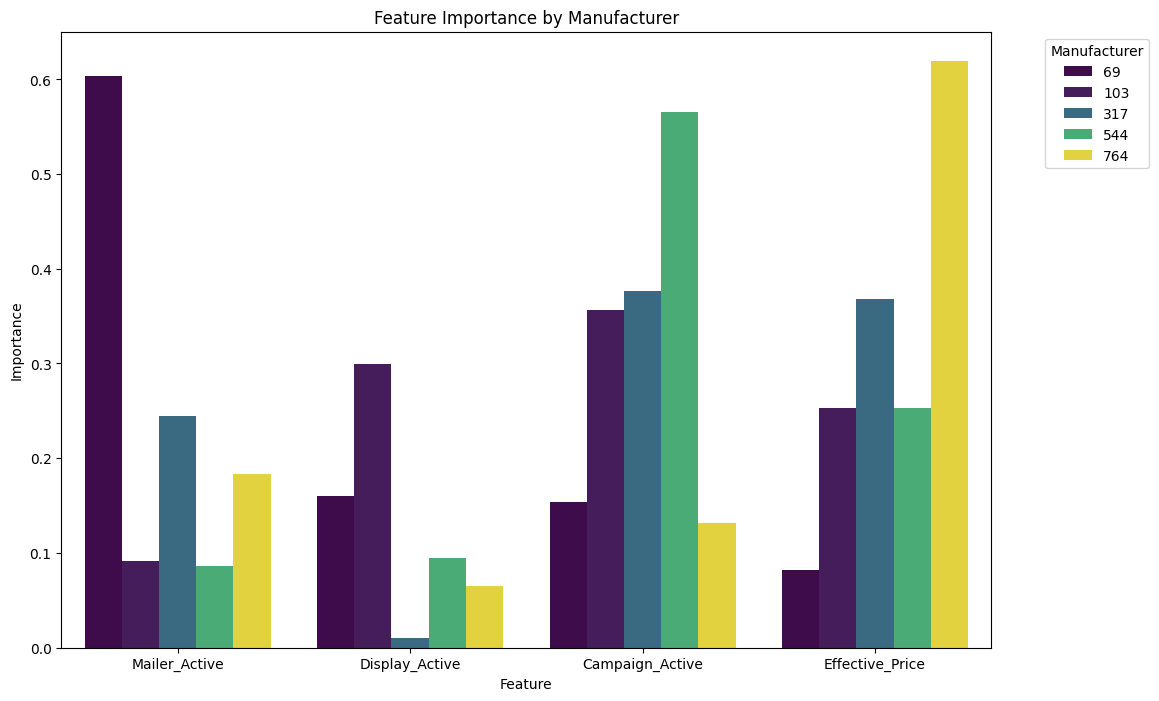

In [ ]:
manufacturers = [69, 103, 317, 544, 764]
results = []

for manufacturer in manufacturers:
    # Filter Data for the Manufacturer
    manufacturer_data = aggregated_data[aggregated_data["MANUFACTURER"] == manufacturer]

    # Prepare Features and Target
    X = manufacturer_data[features]
    y = manufacturer_data["SALES_VALUE"]

    # Handle Missing Values
    X = X.fillna(0)
    y = y.fillna(0)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Get Feature Importance
    feature_importance = pd.DataFrame({
        "Feature": features,
        "Importance": model.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Store Results
    results.append({
        "Manufacturer": manufacturer,
        "R-squared": r2,
        "MSE": mse,
        "Feature Importance": feature_importance
    })

# Display Results
for result in results:
    print(f"Manufacturer: {result['Manufacturer']}")
    print(f"R-squared: {result['R-squared']:.2f}")
    print(f"Mean Squared Error: {result['MSE']:.2f}")
    print("Feature Importance:")
    print(result["Feature Importance"])
    print("\n")

# Visualize Feature Importance Across Manufacturers
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate Feature Importance for Visualization
importance_data = []
for result in results:
    for _, row in result["Feature Importance"].iterrows():
        importance_data.append({
            "Manufacturer": result["Manufacturer"],
            "Feature": row["Feature"],
            "Importance": row["Importance"]
        })

importance_df = pd.DataFrame(importance_data)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    x="Feature",
    y="Importance",
    hue="Manufacturer",
    palette="viridis"
)
plt.title("Feature Importance by Manufacturer")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Brand Type Summary for Top 5 Manufacturers:
   MANUFACTURER     BRAND  Count
0            69   Private  12676
1           103  National    535
2           317  National    669
3           544  National    915
4           764  National   1332


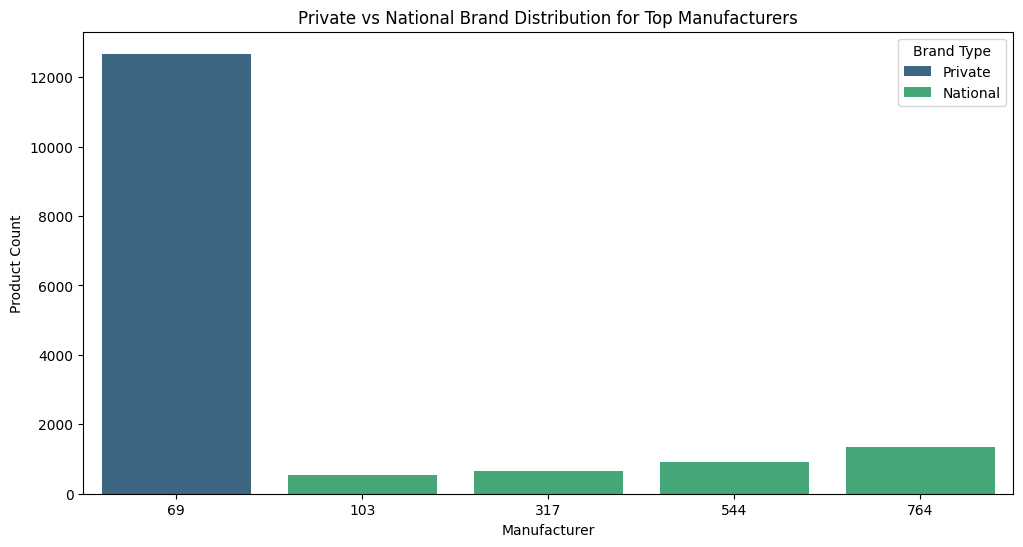

In [ ]:
# Step 1: Filter for Top 5 Manufacturers in Grocery
top_manufacturers = [69, 103, 317, 544, 764]

# Step 2: Check Brand Type for Each Manufacturer
brand_type_summary = product[product["MANUFACTURER"].isin(top_manufacturers)].groupby(
    ["MANUFACTURER", "BRAND"]
).size().reset_index(name="Count")

# Step 3: Summarize Results
brand_type_summary = brand_type_summary.sort_values(
    by=["MANUFACTURER", "Count"], ascending=[True, False]
)

# Display Results
print("Brand Type Summary for Top 5 Manufacturers:")
print(brand_type_summary)

# Step 4: Visualize Brand Distribution for Top Manufacturers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(
    data=product[product["MANUFACTURER"].isin(top_manufacturers)],
    x="MANUFACTURER",
    hue="BRAND",
    palette="viridis"
)
plt.title("Private vs National Brand Distribution for Top Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Product Count")
plt.legend(title="Brand Type")
plt.show()


<ipython-input-10-16c08b9103ab>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drug_gm_revenue.head(5), x="MANUFACTURER", y="Total_Revenue", palette="viridis")


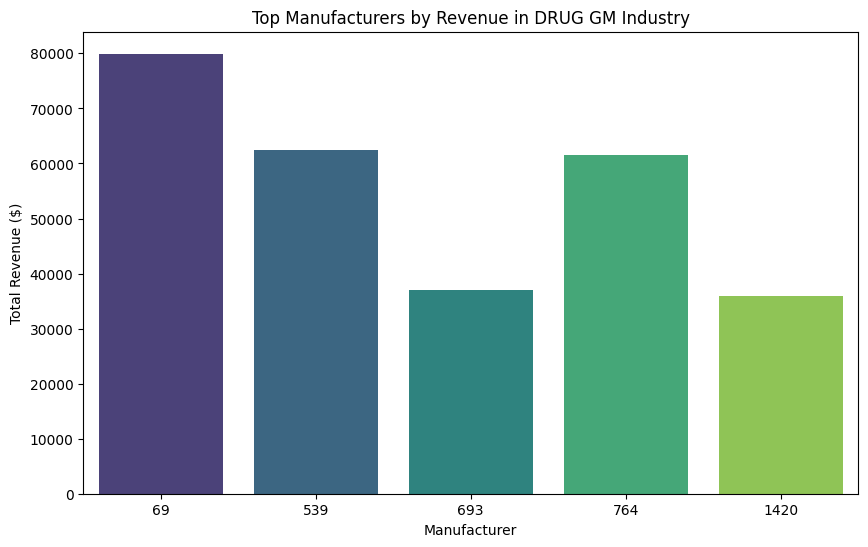

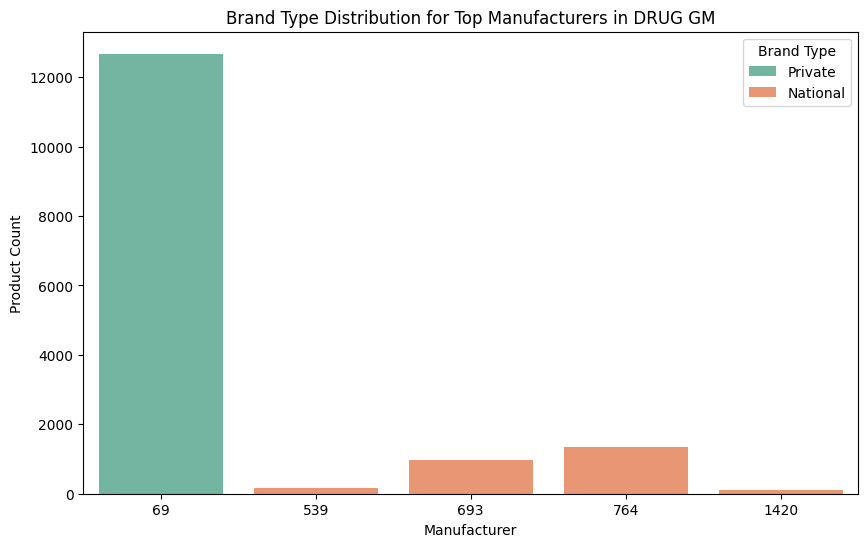

Top Manufacturers in DRUG GM by Revenue:
     MANUFACTURER  Total_Revenue  Total_Quantity  Effective_Price
29             69   79937.500000           26341         3.034718
234           539   62357.730469           10323         6.040660
333           764   61502.500000           10373         5.929095
302           693   36939.250000           41588         0.888219
618          1420   35887.230469            4765         7.531423

Brand Type Summary for Top Manufacturers in DRUG GM:
   MANUFACTURER Brand_Type  Count
0            69    Private  12676
1           539   National    170
2           693   National    979
3           764   National   1332
4          1420   National    100


In [ ]:
# Step 1: Filter Data for DRUG GM
drug_gm_data = transaction_data.merge(product, on="PRODUCT_ID", how="left")
drug_gm_data = drug_gm_data[drug_gm_data["DEPARTMENT"] == "DRUG GM"]

# Step 2: Calculate Revenue for Each Manufacturer
drug_gm_revenue = drug_gm_data.groupby("MANUFACTURER").agg(
    Total_Revenue=("SALES_VALUE", "sum"),
    Total_Quantity=("QUANTITY", "sum"),
).reset_index()
drug_gm_revenue["Effective_Price"] = drug_gm_revenue["Total_Revenue"] / drug_gm_revenue["Total_Quantity"]

# Sort by Revenue
drug_gm_revenue = drug_gm_revenue.sort_values(by="Total_Revenue", ascending=False)

# Step 3: Get Top 5 Manufacturers by Revenue
top_drug_revenue_manufacturers = drug_gm_revenue.head(5)["MANUFACTURER"].tolist()

# Step 4: Determine Brand Type (Private or National)
product["Brand_Type"] = product["MANUFACTURER"].apply(
    lambda x: "Private" if x == 69 else "National"  # Adjust if needed
)

# Step 5: Check Brand Type for Top Drug Manufacturers
drug_brand_types = product[product["MANUFACTURER"].isin(top_drug_revenue_manufacturers)].groupby(
    ["MANUFACTURER", "Brand_Type"]
).size().reset_index(name="Count")

# Step 6: Visualize the Results
import seaborn as sns
import matplotlib.pyplot as plt

# Revenue by Manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(data=drug_gm_revenue.head(5), x="MANUFACTURER", y="Total_Revenue", palette="viridis")
plt.title("Top Manufacturers by Revenue in DRUG GM Industry")
plt.xlabel("Manufacturer")
plt.ylabel("Total Revenue ($)")
plt.show()

# Brand Type Distribution
plt.figure(figsize=(10, 6))
sns.barplot(
    data=drug_brand_types,
    x="MANUFACTURER",
    y="Count",
    hue="Brand_Type",
    palette="Set2"
)
plt.title("Brand Type Distribution for Top Manufacturers in DRUG GM")
plt.xlabel("Manufacturer")
plt.ylabel("Product Count")
plt.legend(title="Brand Type")
plt.show()

# Print Results
print("Top Manufacturers in DRUG GM by Revenue:")
print(drug_gm_revenue.head(5))

print("\nBrand Type Summary for Top Manufacturers in DRUG GM:")
print(drug_brand_types)


<ipython-input-12-9de35f8c6dde>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


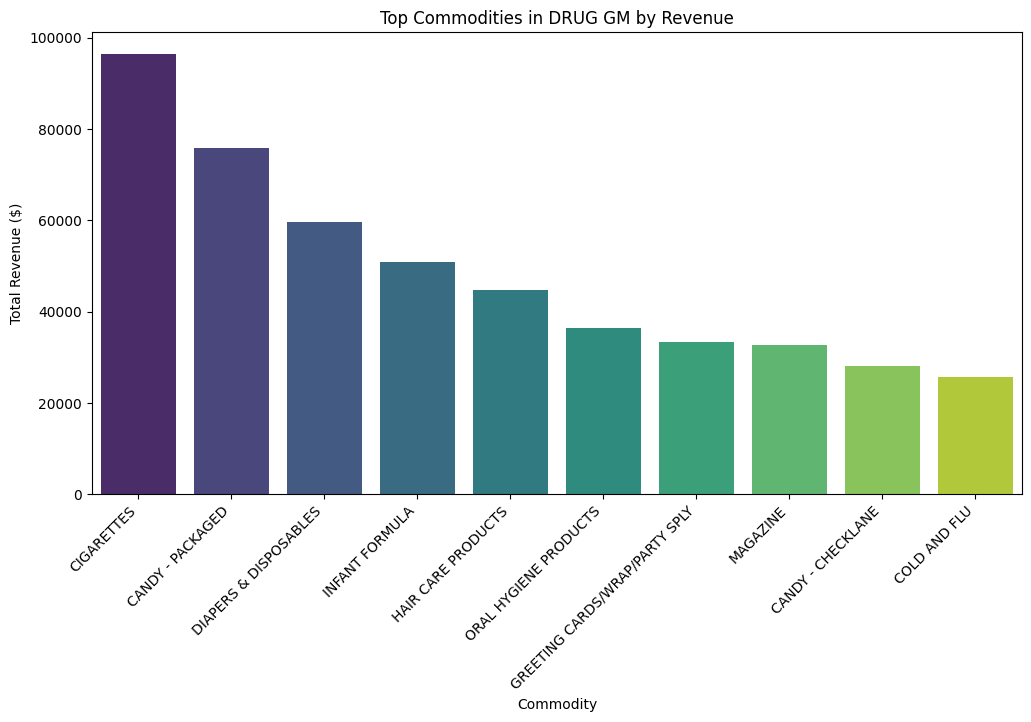

Top Commodities in DRUG GM by Revenue:
                    COMMODITY_DESC  Total_Revenue  Total_Quantity
16                      CIGARETTES   96387.828125           16842
13                CANDY - PACKAGED   75868.820312           44580
24           DIAPERS & DISPOSABLES   59663.699219            5283
56                  INFANT FORMULA   50861.789062            6174
46              HAIR CARE PRODUCTS   44840.519531           12992
68           ORAL HYGIENE PRODUCTS   36423.449219           11993
44  GREETING CARDS/WRAP/PARTY SPLY   33396.589844           13671
64                        MAGAZINE   32785.648438            9802
12               CANDY - CHECKLANE   28116.660156           57594
19                    COLD AND FLU   25642.439453            6800


In [ ]:
# Step 1: Filter Data for DRUG GM
drug_gm_data = transaction_data.merge(product, on="PRODUCT_ID", how="left")
drug_gm_data = drug_gm_data[drug_gm_data["DEPARTMENT"] == "DRUG GM"]

# Step 2: Calculate Revenue by Commodity
drug_gm_commodities = drug_gm_data.groupby("COMMODITY_DESC").agg(
    Total_Revenue=("SALES_VALUE", "sum"),
    Total_Quantity=("QUANTITY", "sum")
).reset_index()

# Step 3: Sort Commodities by Revenue
drug_gm_commodities = drug_gm_commodities.sort_values(by="Total_Revenue", ascending=False)

# Step 4: Visualize Top Commodities
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Commodities by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=drug_gm_commodities.head(10),
    x="COMMODITY_DESC",
    y="Total_Revenue",
    palette="viridis"
)
plt.title("Top Commodities in DRUG GM by Revenue")
plt.xlabel("Commodity")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Print Top Commodities by Revenue
print("Top Commodities in DRUG GM by Revenue:")
print(drug_gm_commodities.head(10))


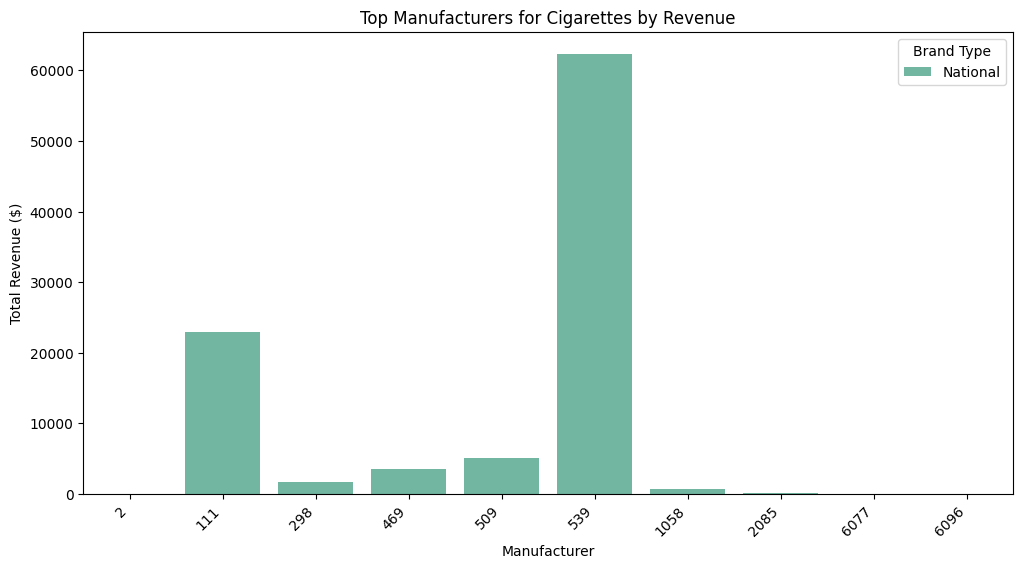

Top Manufacturers for Cigarettes by Revenue:
   MANUFACTURER  Total_Revenue  Total_Quantity     BRAND Brand_Type
0           539   62357.730469           10323  National   National
1           111   22873.279297            4423  National   National
2           509    5072.129883            1052  National   National
3           469    3473.810059             720  National   National
4           298    1718.190063             185  National   National
5          1058     719.400024              64  National   National
6          2085     112.919998              38  National   National
7             2      35.320000              28  National   National
8          6096      17.160000               6  National   National
9          6077       4.000000               2  National   National


In [ ]:
# Step 1: Filter Data for Cigarettes in DRUG GM
cigarettes_data = drug_gm_data[drug_gm_data["COMMODITY_DESC"] == "CIGARETTES"]

# Step 2: Calculate Revenue by Manufacturer
cigarettes_revenue = cigarettes_data.groupby("MANUFACTURER").agg(
    Total_Revenue=("SALES_VALUE", "sum"),
    Total_Quantity=("QUANTITY", "sum")
).reset_index()

# Step 3: Sort Manufacturers by Revenue
cigarettes_revenue = cigarettes_revenue.sort_values(by="Total_Revenue", ascending=False)

# Step 4: Determine Brand Type (Private or National)
cigarettes_revenue = cigarettes_revenue.merge(
    product[["MANUFACTURER", "BRAND"]].drop_duplicates(), on="MANUFACTURER", how="left"
)
cigarettes_revenue["Brand_Type"] = cigarettes_revenue["BRAND"].apply(
    lambda x: "Private" if x == "Private" else "National"
)

# Step 5: Visualize Top Manufacturers for Cigarettes
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Manufacturers by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cigarettes_revenue.head(10),
    x="MANUFACTURER",
    y="Total_Revenue",
    hue="Brand_Type",
    palette="Set2"
)
plt.title("Top Manufacturers for Cigarettes by Revenue")
plt.xlabel("Manufacturer")
plt.ylabel("Total Revenue ($)")
plt.legend(title="Brand Type")
plt.xticks(rotation=45, ha="right")
plt.show()

# Print Top Manufacturers for Cigarettes
print("Top Manufacturers for Cigarettes by Revenue:")
print(cigarettes_revenue.head(10))


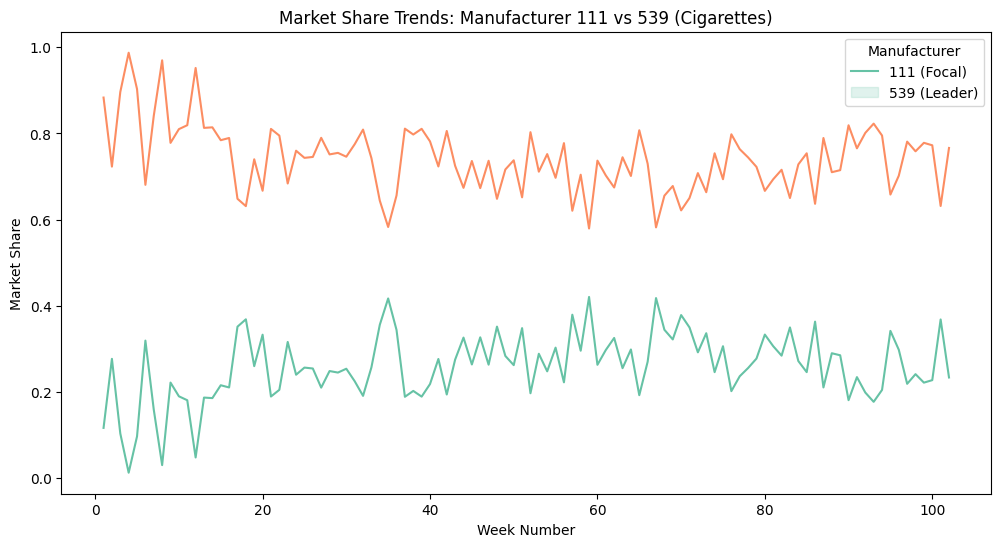

Market Share Data for Manufacturer 111 vs 539:
   WEEK_NO  MANUFACTURER     Revenue  Total_Weekly_Revenue  Market_Share
0        1           111    4.280000             36.660000      0.116749
1        1           539   32.380001             36.660000      0.883252
2        2           111   14.350000             51.809998      0.276974
3        2           539   37.459999             51.809998      0.723026
4        3           111   10.360001             99.820000      0.103787
5        3           539   89.459999             99.820000      0.896213
6        4           111    2.990000            235.190002      0.012713
7        4           539  232.199997            235.190002      0.987287
8        5           111   15.140000            155.960007      0.097076
9        5           539  140.820007            155.960007      0.902924


In [ ]:
# Step 1: Filter Data for Cigarettes and Manufacturers 111 & 539
cigarette_data_filtered = cigarettes_data[
    cigarettes_data["MANUFACTURER"].isin([111, 539])
]

# Step 2: Calculate Weekly Market Share
market_share_data = cigarette_data_filtered.groupby(["WEEK_NO", "MANUFACTURER"]).agg(
    Revenue=("SALES_VALUE", "sum")
).reset_index()

# Calculate Total Weekly Revenue
market_share_data["Total_Weekly_Revenue"] = market_share_data.groupby("WEEK_NO")[
    "Revenue"
].transform("sum")

# Calculate Market Share
market_share_data["Market_Share"] = (
    market_share_data["Revenue"] / market_share_data["Total_Weekly_Revenue"]
)

# Step 3: Visualize Market Share Trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=market_share_data,
    x="WEEK_NO",
    y="Market_Share",
    hue="MANUFACTURER",
    palette="Set2"
)
plt.title("Market Share Trends: Manufacturer 111 vs 539 (Cigarettes)")
plt.xlabel("Week Number")
plt.ylabel("Market Share")
plt.legend(title="Manufacturer", labels=["111 (Focal)", "539 (Leader)"])
plt.show()

# Print Market Share Data for Review
print("Market Share Data for Manufacturer 111 vs 539:")
print(market_share_data.head(10))


Product Dataset:
   PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ  

Transaction Data Dataset:
   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   

<ipython-input-3-13201f0ab43e>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarette_data["MARKET_SHARE"] = cigarette_data["SALES_VALUE"] / cigarette_data["SALES_VALUE"].sum()


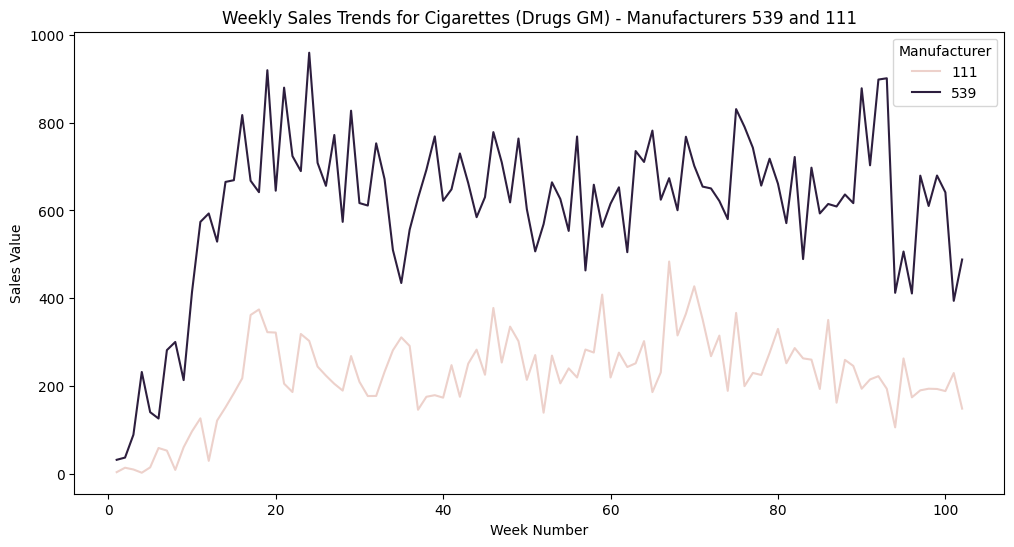

Model Evaluation:
RMSE: 8.430820912473191
R² Score: 0.23950258634064314


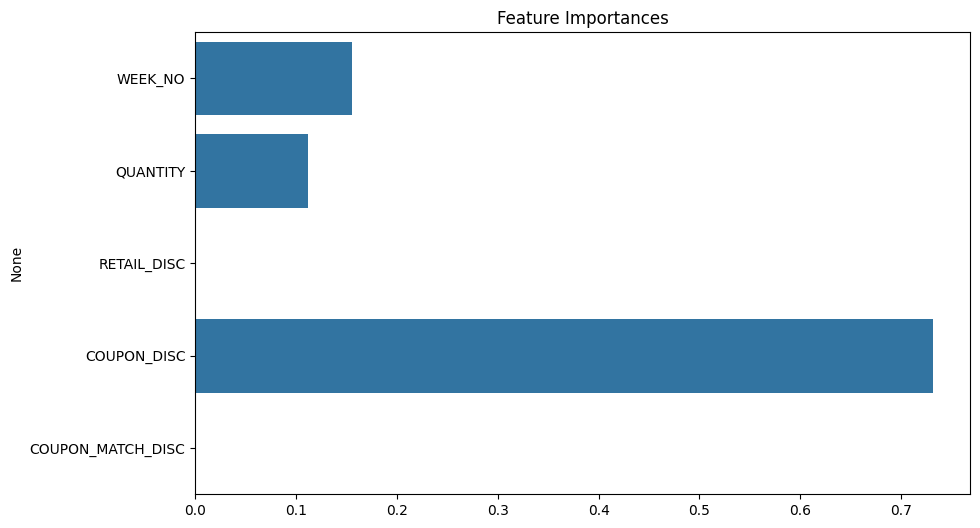

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
causal_data = pd.read_csv("causal_data.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
coupon = pd.read_csv("coupon.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product = pd.read_csv("product.csv")
transaction_data = pd.read_csv("transaction_data.csv")

# Display basic info about the datasets
print("Product Dataset:")
print(product.head())

print("\nTransaction Data Dataset:")
print(transaction_data.head())

# Merge relevant datasets
# Merging transaction data with product info
transaction_data_merged = transaction_data.merge(product, on="PRODUCT_ID", how="left")

# Filter data for Cigarettes in Drugs GM industry
cigarette_data = transaction_data_merged[
    (transaction_data_merged["COMMODITY_DESC"] == "CIGARETTES") &
    (transaction_data_merged["DEPARTMENT"] == "DRUG GM")
]

# Add market share calculation
cigarette_data["MARKET_SHARE"] = cigarette_data["SALES_VALUE"] / cigarette_data["SALES_VALUE"].sum()

# Focus on manufacturers 539 and 111
focus_data = cigarette_data[cigarette_data["MANUFACTURER"].isin([539, 111])]

# Analyze sales trends
sales_trends = focus_data.groupby(["WEEK_NO", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()

# Plot sales trends for manufacturers 539 and 111
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x="WEEK_NO", y="SALES_VALUE", hue="MANUFACTURER")
plt.title("Weekly Sales Trends for Cigarettes (Drugs GM) - Manufacturers 539 and 111")
plt.xlabel("Week Number")
plt.ylabel("Sales Value")
plt.legend(title="Manufacturer")
plt.show()

# Machine learning model to predict sales
# Prepare data for modeling
model_data = focus_data[["SALES_VALUE", "WEEK_NO", "QUANTITY", "RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"]]
model_data = model_data.dropna()  # Drop rows with missing values

X = model_data.drop("SALES_VALUE", axis=1)
y = model_data["SALES_VALUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Model Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


In [ ]:
# Merge filtered transaction data with coupon redemption data
campaign_merged = filtered_transaction_data.merge(coupon_redempt, on=["household_key", "DAY"], how="left")
print("After merging with coupon_redempt:", campaign_merged.columns)

# Merge with campaign table using household_key
campaign_merged = campaign_merged.merge(campaign_table, on="household_key", how="left")
print("After merging with campaign_table:", campaign_merged.columns)

# Resolve column conflict by selecting the correct CAMPAIGN column
campaign_merged["CAMPAIGN"] = campaign_merged["CAMPAIGN_y"]  # Use CAMPAIGN from campaign_table
campaign_merged.drop(["CAMPAIGN_x", "CAMPAIGN_y"], axis=1, inplace=True)

# Merge with campaign description using CAMPAIGN
campaign_merged = campaign_merged.merge(campaign_desc, on="CAMPAIGN", how="left", suffixes=("_transaction", "_desc"))
print("After merging with campaign_desc:", campaign_merged.columns)


After merging with coupon_redempt: Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'COUPON_UPC', 'CAMPAIGN'],
      dtype='object')
After merging with campaign_table: Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'COUPON_UPC', 'CAMPAIGN_x', 'DESCRIPTION', 'CAMPAIGN_y'],
      dtype='object')
After merging with campaign_desc: Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_

<ipython-input-13-f8b2a32220b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_111_data["CAMPAIGN_ACTIVE"] = campaign_111_data["CAMPAIGN"].notna()


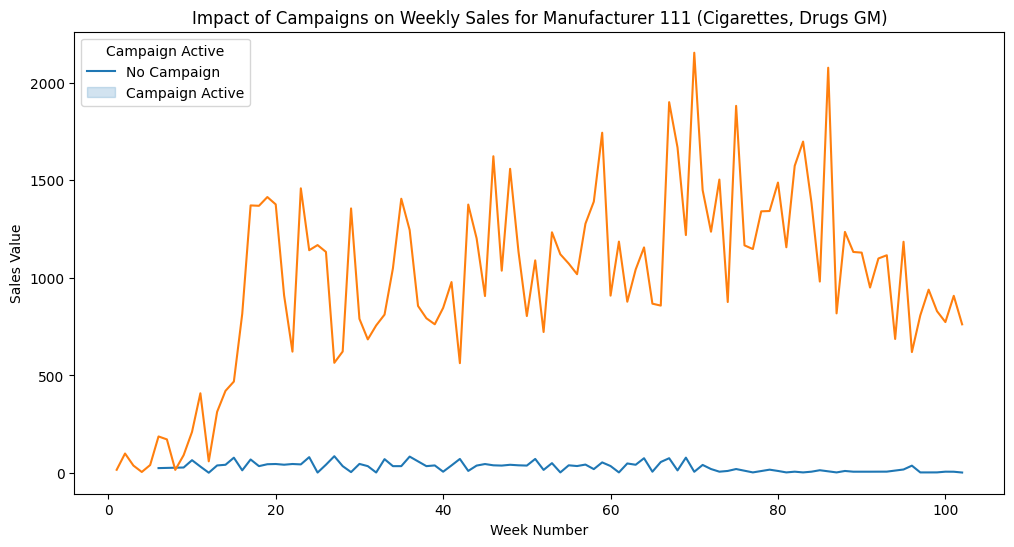

In [ ]:
# Filter for Manufacturer 111
campaign_111_data = campaign_merged[
    (campaign_merged["MANUFACTURER"] == 111) &
    (campaign_merged["COMMODITY_DESC"] == "CIGARETTES") &
    (campaign_merged["DEPARTMENT"] == "DRUG GM")
]

# Check if campaigns are active
campaign_111_data["CAMPAIGN_ACTIVE"] = campaign_111_data["CAMPAIGN"].notna()

# Group by week and campaign activity to analyze sales
campaign_sales = campaign_111_data.groupby(["WEEK_NO", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()

# Plot campaign impact
plt.figure(figsize=(12, 6))
sns.lineplot(data=campaign_sales, x="WEEK_NO", y="SALES_VALUE", hue="CAMPAIGN_ACTIVE")
plt.title("Impact of Campaigns on Weekly Sales for Manufacturer 111 (Cigarettes, Drugs GM)")
plt.xlabel("Week Number")
plt.ylabel("Sales Value")
plt.legend(title="Campaign Active", labels=["No Campaign", "Campaign Active"])
plt.show()


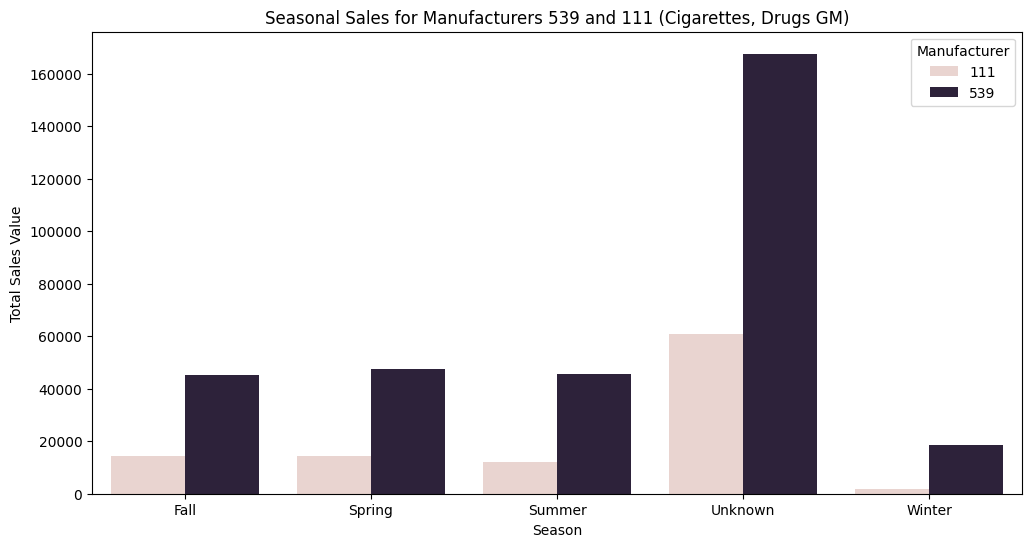

In [ ]:
# Define seasons based on week number
def get_season(week_no):
    if 1 <= week_no <= 13:
        return "Winter"
    elif 14 <= week_no <= 26:
        return "Spring"
    elif 27 <= week_no <= 39:
        return "Summer"
    elif 40 <= week_no <= 52:
        return "Fall"
    else:
        return "Unknown"

# Add season information
campaign_merged["SEASON"] = campaign_merged["WEEK_NO"].apply(get_season)

# Filter for Manufacturers 111 and 539
focus_data = campaign_merged[campaign_merged["MANUFACTURER"].isin([539, 111])]

# Group by season and manufacturer to analyze sales
seasonal_sales = focus_data.groupby(["SEASON", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()

# Plot seasonal sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_sales, x="SEASON", y="SALES_VALUE", hue="MANUFACTURER")
plt.title("Seasonal Sales for Manufacturers 539 and 111 (Cigarettes, Drugs GM)")
plt.xlabel("Season")
plt.ylabel("Total Sales Value")
plt.legend(title="Manufacturer")
plt.show()


<ipython-input-15-f37146a66246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_data["PRICE_PER_UNIT"] = focus_data["SALES_VALUE"] / focus_data["QUANTITY"]


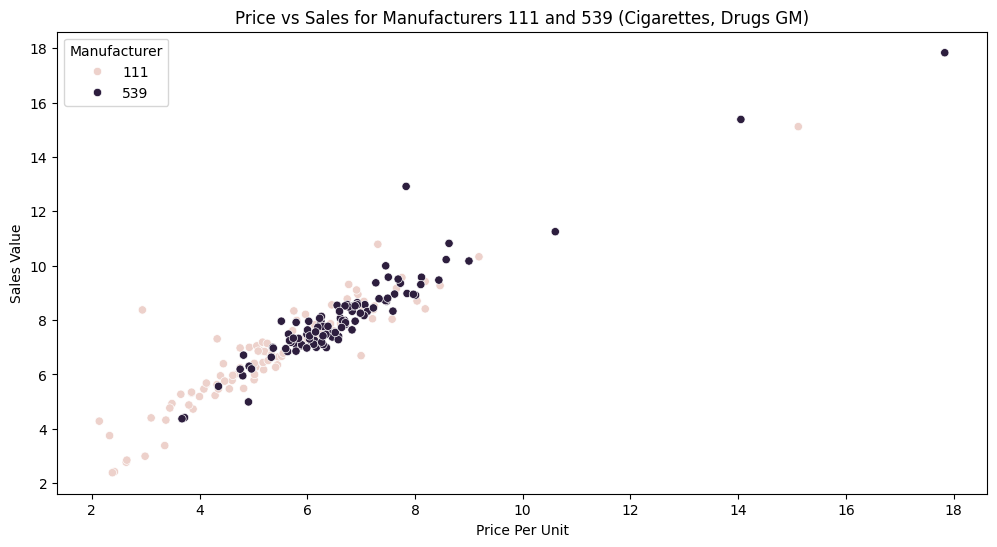

In [ ]:
# Calculate average price per unit
focus_data["PRICE_PER_UNIT"] = focus_data["SALES_VALUE"] / focus_data["QUANTITY"]

# Group by manufacturer and week to analyze price trends
price_sales_data = focus_data.groupby(["MANUFACTURER", "WEEK_NO"])[
    ["PRICE_PER_UNIT", "SALES_VALUE"]
].mean().reset_index()

# Plot price vs sales for each manufacturer
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_sales_data, x="PRICE_PER_UNIT", y="SALES_VALUE", hue="MANUFACTURER")
plt.title("Price vs Sales for Manufacturers 111 and 539 (Cigarettes, Drugs GM)")
plt.xlabel("Price Per Unit")
plt.ylabel("Sales Value")
plt.legend(title="Manufacturer")
plt.show()


In [ ]:
# Assume campaign costs data or derive proxy costs
# Example: Assign random costs for campaigns (in practice, replace with actual data)
campaign_111_data["CAMPAIGN_COST"] = campaign_111_data["CAMPAIGN_ACTIVE"].apply(lambda x: 1000 if x else 0)

# Calculate ROI
campaign_111_data["SALES_UPLIFT"] = campaign_111_data["SALES_VALUE"] - campaign_111_data["SALES_VALUE"].shift(1)
campaign_111_data["ROI"] = (campaign_111_data["SALES_UPLIFT"] / campaign_111_data["CAMPAIGN_COST"]).fillna(0)

# Group by campaign status for average ROI
roi_analysis = campaign_111_data.groupby("CAMPAIGN_ACTIVE")["ROI"].mean().reset_index()
print("Average ROI for Campaigns:")
print(roi_analysis)


Average ROI for Campaigns:
   CAMPAIGN_ACTIVE       ROI
0            False       NaN
1             True -0.000088


<ipython-input-16-6b4586c3b8a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_111_data["CAMPAIGN_COST"] = campaign_111_data["CAMPAIGN_ACTIVE"].apply(lambda x: 1000 if x else 0)
<ipython-input-16-6b4586c3b8a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_111_data["SALES_UPLIFT"] = campaign_111_data["SALES_VALUE"] - campaign_111_data["SALES_VALUE"].shift(1)
<ipython-input-16-6b4586c3b8a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [ ]:
# ROI by campaign
campaign_roi = campaign_111_data.groupby("CAMPAIGN")[["SALES_UPLIFT", "CAMPAIGN_COST"]].sum().reset_index()

# Calculate ROI
campaign_roi["ROI"] = campaign_roi["SALES_UPLIFT"] / campaign_roi["CAMPAIGN_COST"]

# Print the ROI analysis sorted by ROI values
print("ROI by Campaign:")
print(campaign_roi.sort_values(by="ROI", ascending=False))

ROI by Campaign:
    CAMPAIGN  SALES_UPLIFT  CAMPAIGN_COST       ROI
7        8.0       1242.83        1949000  0.000638
6        7.0         32.10         573000  0.000056
0        1.0          0.00           6000  0.000000
13      14.0          0.00         664000  0.000000
21      22.0          0.00         717000  0.000000
20      21.0          0.00          55000  0.000000
19      20.0          0.00         763000  0.000000
24      25.0          0.00         589000  0.000000
26      27.0          0.00          37000  0.000000
16      17.0          0.00         661000  0.000000
1        2.0          0.00          76000  0.000000
14      15.0          0.00         115000  0.000000
11      12.0          0.00         453000  0.000000
27      28.0          0.00           6000  0.000000
10      11.0          0.00         238000  0.000000
9       10.0          0.00         198000  0.000000
8        9.0          0.00         189000  0.000000
5        6.0          0.00          83000  0.00

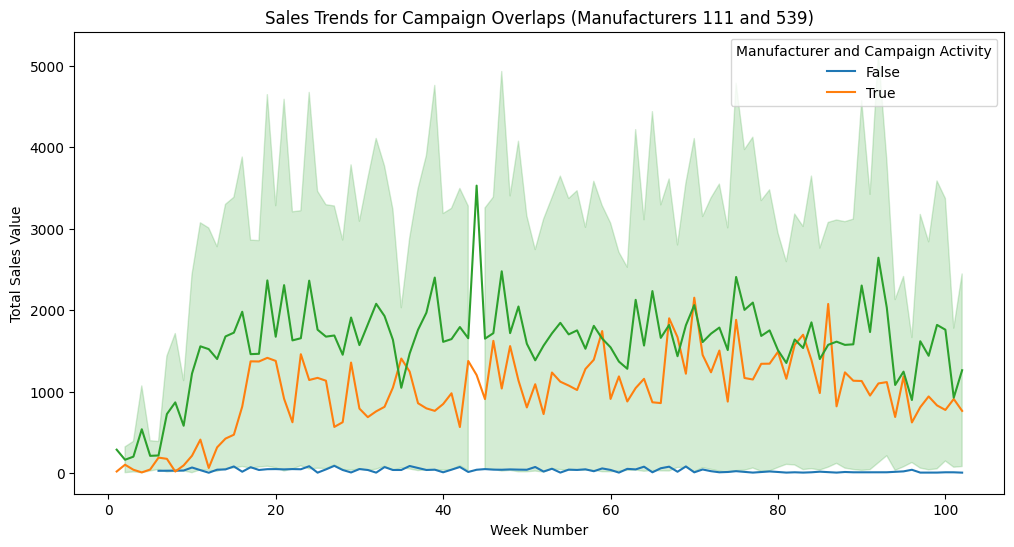

In [ ]:
# Plot sales trends during campaign overlaps
plt.figure(figsize=(12, 6))

# Plot for Manufacturer 111
sns.lineplot(data=weekly_sales[weekly_sales["MANUFACTURER"] == 111],
             x="WEEK_NO", y="SALES_VALUE", hue="CAMPAIGN_ACTIVE")
# Plot for Manufacturer 539
sns.lineplot(data=weekly_sales[weekly_sales["MANUFACTURER"] == 539],
             x="WEEK_NO", y="SALES_VALUE")

plt.title("Sales Trends for Campaign Overlaps (Manufacturers 111 and 539)")
plt.xlabel("Week Number")
plt.ylabel("Total Sales Value")
plt.legend(title="Manufacturer and Campaign Activity")
plt.show()


<ipython-input-26-6f2df90e3b59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_111_data["SEASON"] = campaign_111_data["WEEK_NO"].apply(get_season)


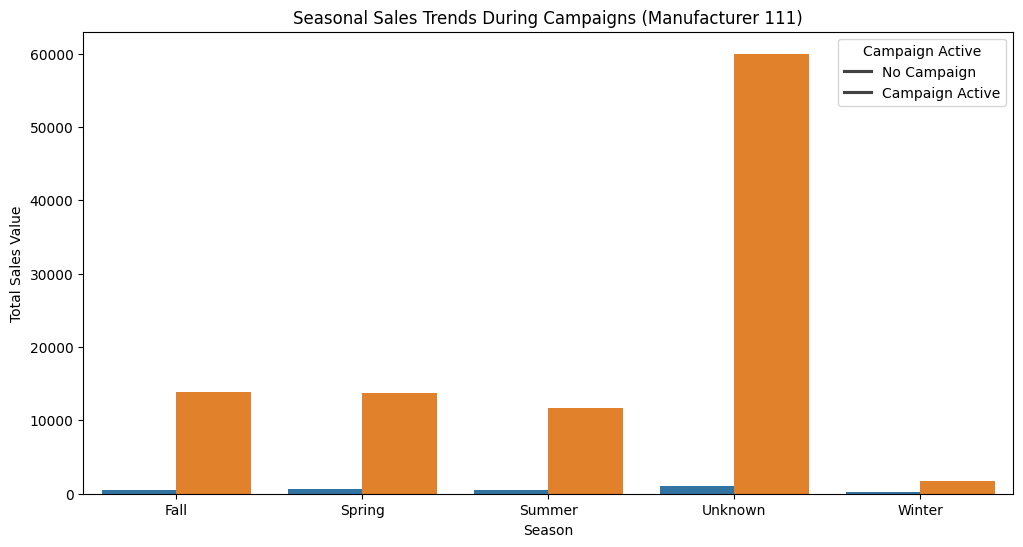

In [ ]:
# Add season information if not already added
if "SEASON" not in campaign_111_data.columns:
    campaign_111_data["SEASON"] = campaign_111_data["WEEK_NO"].apply(get_season)

# Group by season and campaign activity to calculate sales
seasonal_sales = campaign_111_data.groupby(["SEASON", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()

# Plot seasonal sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_sales, x="SEASON", y="SALES_VALUE", hue="CAMPAIGN_ACTIVE")
plt.title("Seasonal Sales Trends During Campaigns (Manufacturer 111)")
plt.xlabel("Season")
plt.ylabel("Total Sales Value")
plt.legend(title="Campaign Active", labels=["No Campaign", "Campaign Active"])
plt.show()


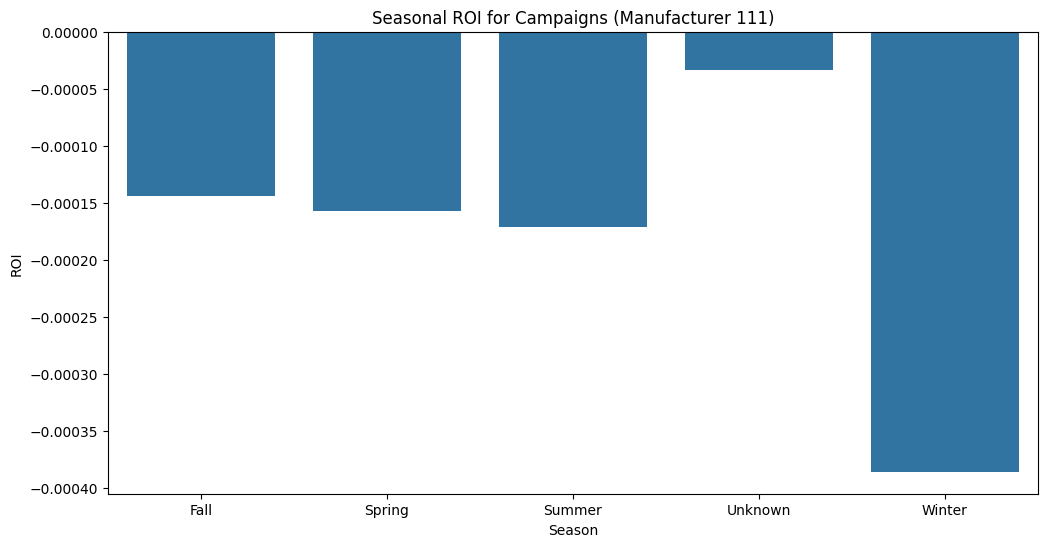

In [ ]:
# Calculate total sales uplift and campaign costs by season
seasonal_roi = campaign_111_data.groupby(["SEASON", "CAMPAIGN_ACTIVE"])[["SALES_UPLIFT", "CAMPAIGN_COST"]].sum().reset_index()

# Calculate ROI
seasonal_roi["ROI"] = seasonal_roi["SALES_UPLIFT"] / seasonal_roi["CAMPAIGN_COST"]

# Plot seasonal ROI
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_roi[seasonal_roi["CAMPAIGN_ACTIVE"] == True], x="SEASON", y="ROI")
plt.title("Seasonal ROI for Campaigns (Manufacturer 111)")
plt.xlabel("Season")
plt.ylabel("ROI")
plt.show()


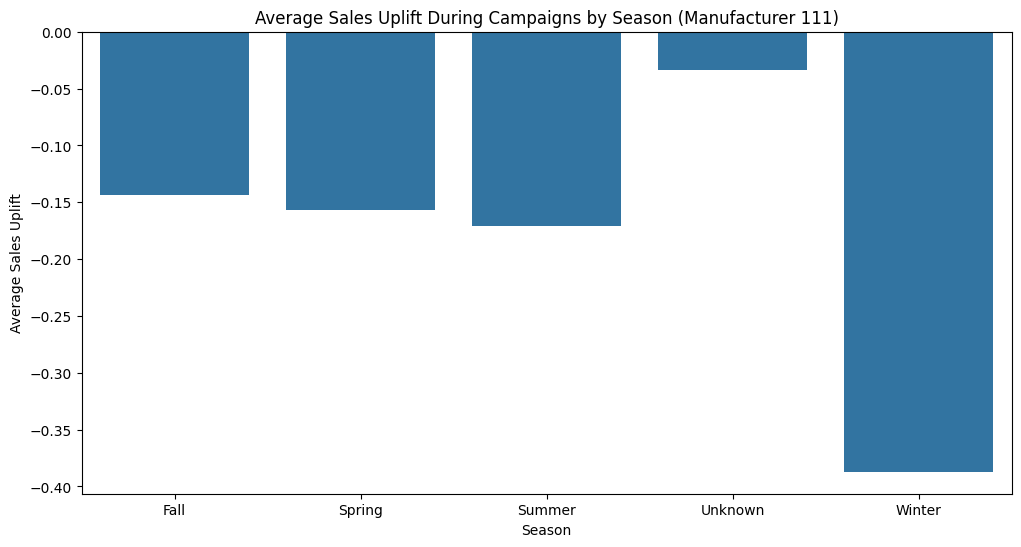

In [ ]:
# Analyze sales uplift by season
seasonal_uplift = campaign_111_data.groupby(["SEASON", "CAMPAIGN_ACTIVE"])["SALES_UPLIFT"].mean().reset_index()

# Plot sales uplift by season
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_uplift[seasonal_uplift["CAMPAIGN_ACTIVE"] == True], x="SEASON", y="SALES_UPLIFT")
plt.title("Average Sales Uplift During Campaigns by Season (Manufacturer 111)")
plt.xlabel("Season")
plt.ylabel("Average Sales Uplift")
plt.show()


<Figure size 1200x600 with 0 Axes>

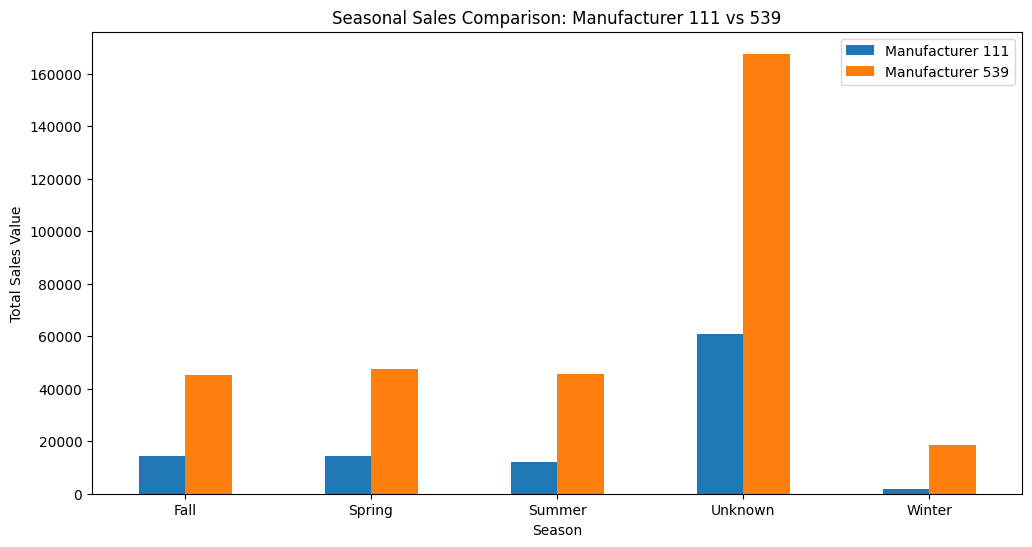

In [ ]:
# Seasonal sales comparison between Manufacturers 111 and 539
seasonal_competitor_sales = competitor_data.groupby(["SEASON", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()

# Pivot table for better comparison
seasonal_sales_pivot = seasonal_competitor_sales.pivot(index="SEASON", columns="MANUFACTURER", values="SALES_VALUE")
seasonal_sales_pivot.columns = ["Sales_111", "Sales_539"]

# Plot seasonal comparison
plt.figure(figsize=(12, 6))
seasonal_sales_pivot.plot(kind="bar", figsize=(12, 6), rot=0)
plt.title("Seasonal Sales Comparison: Manufacturer 111 vs 539")
plt.xlabel("Season")
plt.ylabel("Total Sales Value")
plt.legend(["Manufacturer 111", "Manufacturer 539"])
plt.show()


<ipython-input-34-9440190cae81>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data.groupby(["SEGMENT", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()


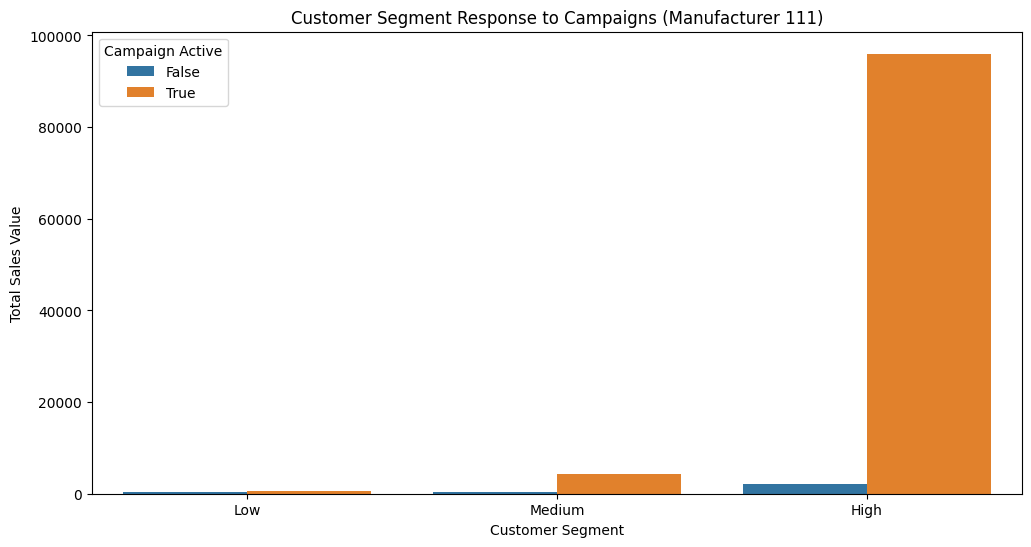

<ipython-input-34-9440190cae81>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data.groupby(["SEGMENT", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()


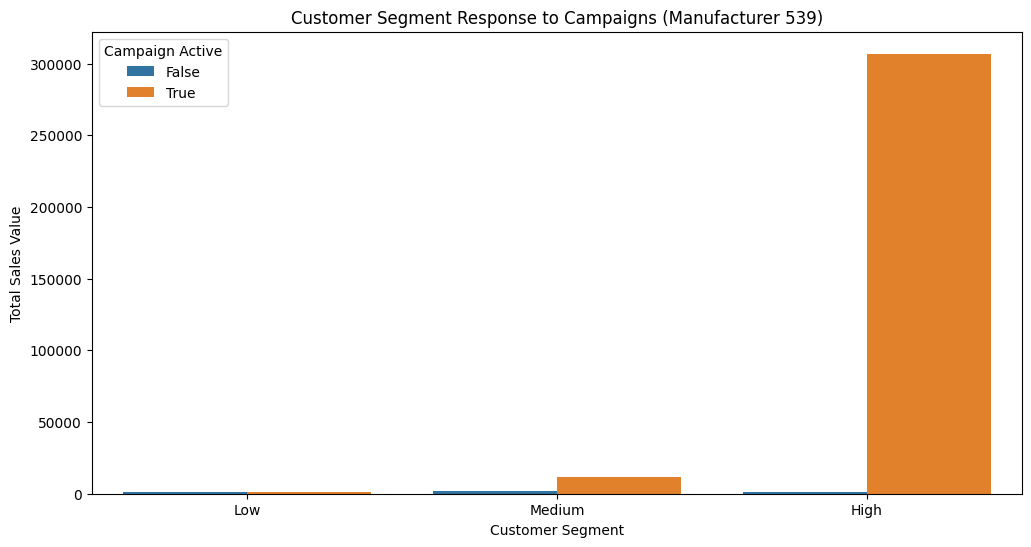

In [ ]:
# Analyze customer segments for both manufacturers
customer_data_111 = campaign_111_data.groupby("household_key")["SALES_VALUE"].agg(["sum", "count"]).reset_index()
customer_data_111.rename(columns={"sum": "TOTAL_SPEND", "count": "PURCHASE_COUNT"}, inplace=True)
customer_data_111["SEGMENT"] = pd.qcut(customer_data_111["TOTAL_SPEND"], 3, labels=["Low", "Medium", "High"])

customer_data_539 = campaign_merged[campaign_merged["MANUFACTURER"] == 539].groupby("household_key")["SALES_VALUE"].agg(["sum", "count"]).reset_index()
customer_data_539.rename(columns={"sum": "TOTAL_SPEND", "count": "PURCHASE_COUNT"}, inplace=True)
customer_data_539["SEGMENT"] = pd.qcut(customer_data_539["TOTAL_SPEND"], 3, labels=["Low", "Medium", "High"])

# Merge segmentation back to campaign data for both manufacturers
segment_response_111 = campaign_111_data.merge(customer_data_111, on="household_key")
segment_response_539 = campaign_merged[campaign_merged["MANUFACTURER"] == 539].merge(customer_data_539, on="household_key")

# Group and plot for each manufacturer
for data, manufacturer in [(segment_response_111, "111"), (segment_response_539, "539")]:
    segment_analysis = data.groupby(["SEGMENT", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=segment_analysis, x="SEGMENT", y="SALES_VALUE", hue="CAMPAIGN_ACTIVE")
    plt.title(f"Customer Segment Response to Campaigns (Manufacturer {manufacturer})")
    plt.xlabel("Customer Segment")
    plt.ylabel("Total Sales Value")
    plt.legend(title="Campaign Active")
    plt.show()


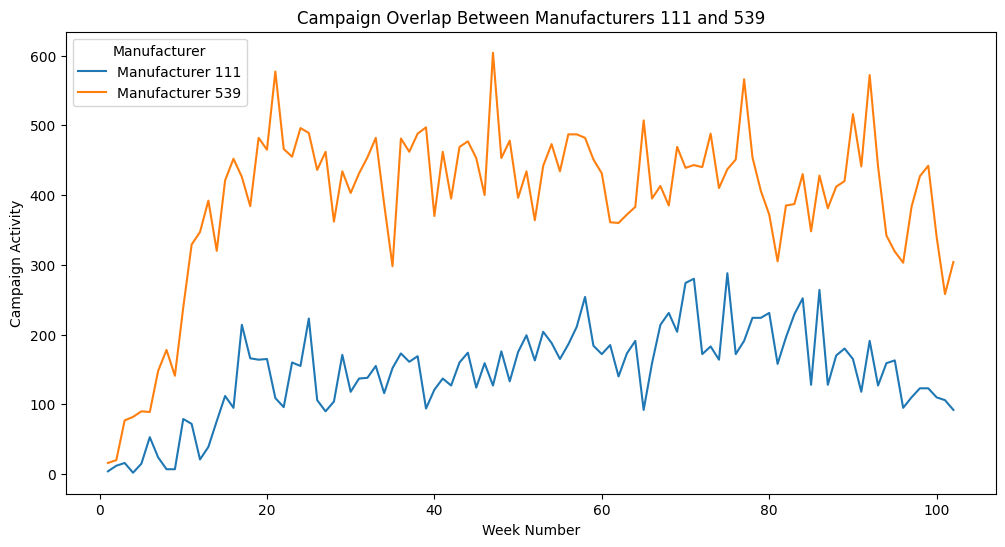

In [ ]:
# Analyze campaign overlap for Manufacturers 111 and 539
competitor_campaigns = competitor_data.groupby(["WEEK_NO", "MANUFACTURER"])["CAMPAIGN"].apply(lambda x: x.notna().sum()).reset_index()
competitor_campaigns_pivot = competitor_campaigns.pivot(index="WEEK_NO", columns="MANUFACTURER", values="CAMPAIGN").reset_index()
competitor_campaigns_pivot.columns = ["WEEK_NO", "Campaign_111", "Campaign_539"]

# Plot overlap
plt.figure(figsize=(12, 6))
plt.plot(competitor_campaigns_pivot["WEEK_NO"], competitor_campaigns_pivot["Campaign_111"], label="Manufacturer 111")
plt.plot(competitor_campaigns_pivot["WEEK_NO"], competitor_campaigns_pivot["Campaign_539"], label="Manufacturer 539")
plt.title("Campaign Overlap Between Manufacturers 111 and 539")
plt.xlabel("Week Number")
plt.ylabel("Campaign Activity")
plt.legend(title="Manufacturer")
plt.show()


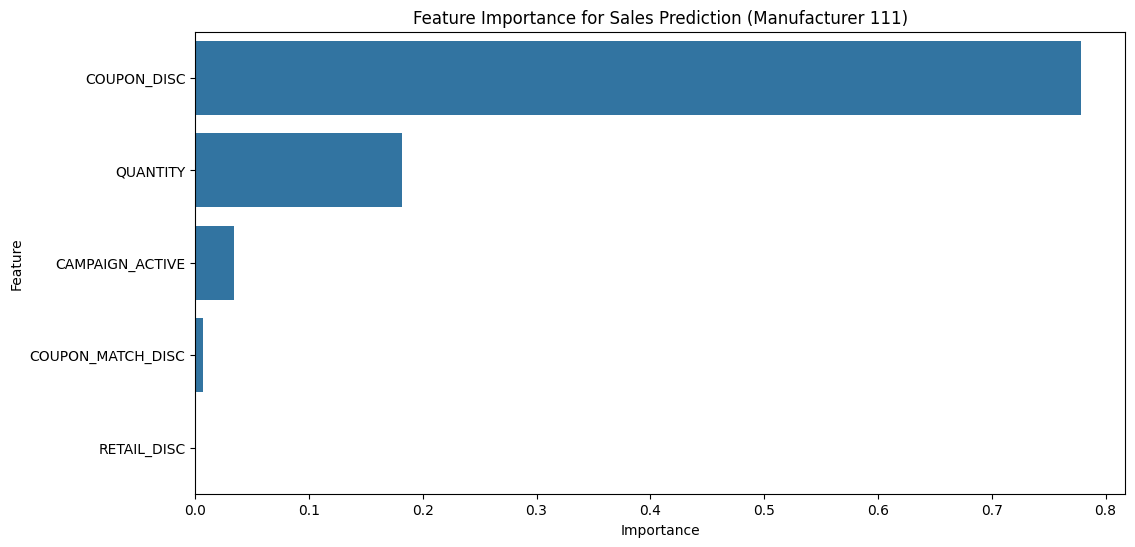

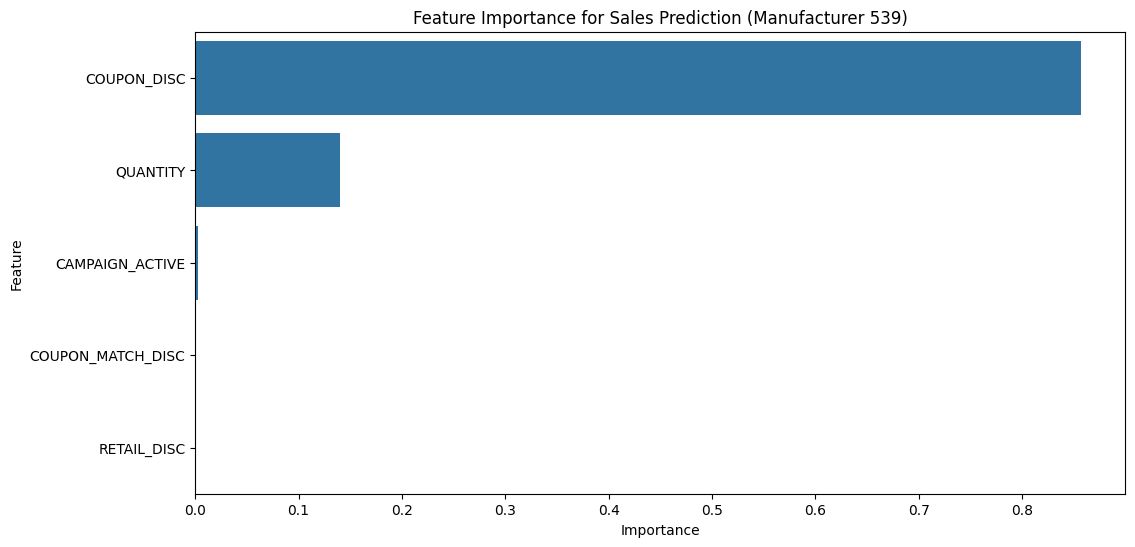

In [ ]:
# Compare feature importance between manufacturers
for manufacturer, data in [(111, campaign_111_data), (539, campaign_merged[campaign_merged["MANUFACTURER"] == 539])]:
    features = ["QUANTITY", "RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC", "CAMPAIGN_ACTIVE"]
    target = "SALES_VALUE"
    X = data[features].fillna(0)
    y = data[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train random forest regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Feature importance
    importance = model.feature_importances_
    importance_df = pd.DataFrame({"Feature": features, "Importance": importance}).sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x="Importance", y="Feature")
    plt.title(f"Feature Importance for Sales Prediction (Manufacturer {manufacturer})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


<ipython-input-43-c612869270ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_data["MARKET_SHARE"] = top_5_data["SALES_VALUE"] / weekly_top_5_sales


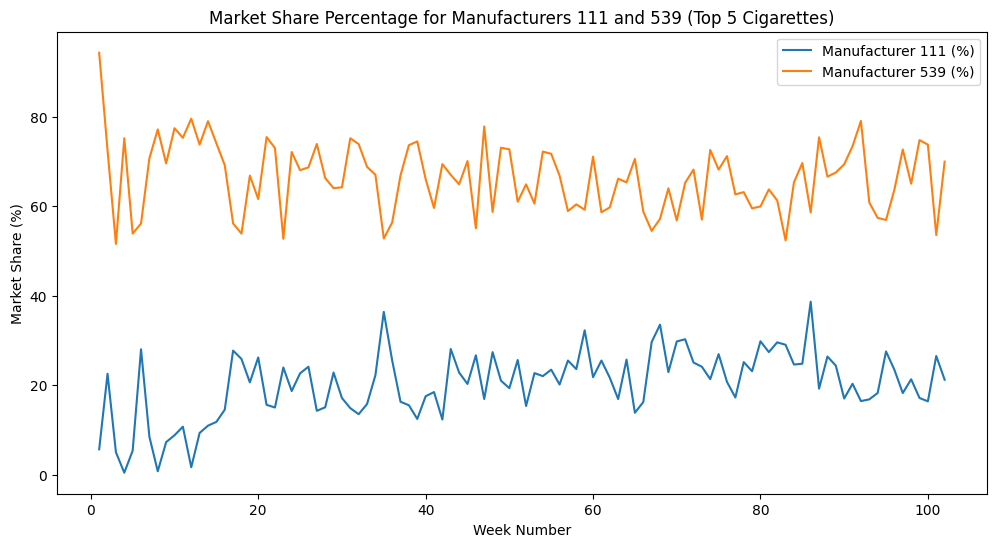

In [ ]:
# Step 1: Identify Top 5 Manufacturers by Total Sales
top_5_manufacturers = cigarettes_data.groupby("MANUFACTURER")["SALES_VALUE"].sum().nlargest(5).index

# Filter the data for only the top 5 manufacturers
top_5_data = cigarettes_data[cigarettes_data["MANUFACTURER"].isin(top_5_manufacturers)]

# Step 2: Calculate Weekly Total Sales for Top 5 Manufacturers
# Group by WEEK_NO to get the total sales of the top 5 manufacturers in each week
weekly_top_5_sales = top_5_data.groupby("WEEK_NO")["SALES_VALUE"].transform("sum")

# Calculate market share for each manufacturer within the top 5
top_5_data["MARKET_SHARE"] = top_5_data["SALES_VALUE"] / weekly_top_5_sales

# Step 3: Filter for Manufacturers 111 and 539
market_share_111_539 = top_5_data[top_5_data["MANUFACTURER"].isin([111, 539])].groupby(
    ["WEEK_NO", "MANUFACTURER"]
)["MARKET_SHARE"].sum().reset_index()

# Pivot data for visualization
market_share_pivot = market_share_111_539.pivot(index="WEEK_NO", columns="MANUFACTURER", values="MARKET_SHARE")
market_share_pivot.columns = ["Market_Share_111", "Market_Share_539"]

# Convert to percentage for better visualization
market_share_pivot["Market_Share_111_Percentage"] = market_share_pivot["Market_Share_111"] * 100
market_share_pivot["Market_Share_539_Percentage"] = market_share_pivot["Market_Share_539"] * 100

# Step 4: Plot Market Share Percentages
plt.figure(figsize=(12, 6))
plt.plot(market_share_pivot.index, market_share_pivot["Market_Share_111_Percentage"], label="Manufacturer 111 (%)")
plt.plot(market_share_pivot.index, market_share_pivot["Market_Share_539_Percentage"], label="Manufacturer 539 (%)")
plt.title("Market Share Percentage for Manufacturers 111 and 539 (Top 5 Cigarettes)")
plt.xlabel("Week Number")
plt.ylabel("Market Share (%)")
plt.legend()
plt.show()


In [ ]:
# Fill NaNs with the mean or use forward-fill/backward-fill methods
price_pivot["Price_111"].fillna(method="ffill", inplace=True)


<ipython-input-45-48a71876b3ce>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_pivot["Price_111"].fillna(method="ffill", inplace=True)


<ipython-input-50-15bc899dfafd>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_pivot.fillna(method="ffill", inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of

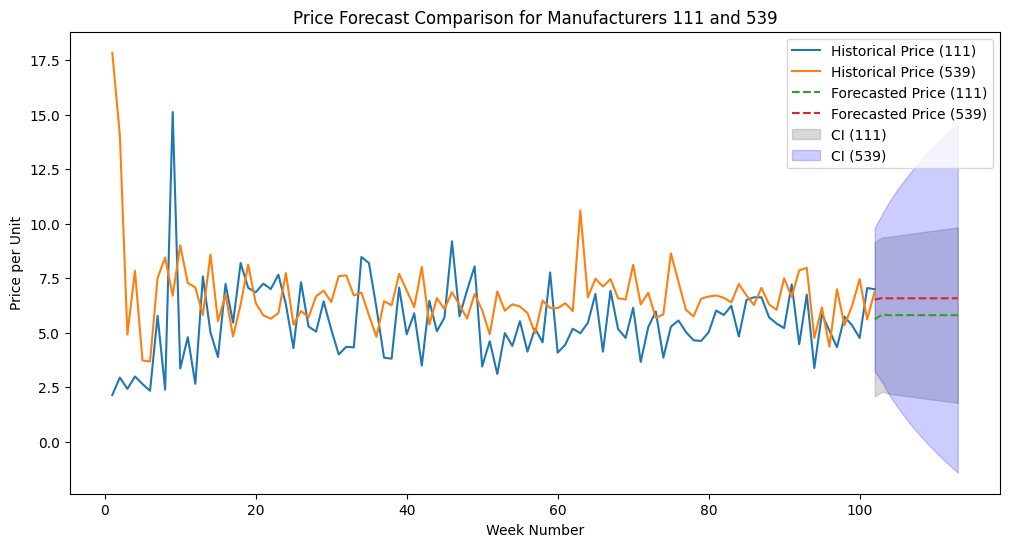

In [ ]:

# Replace inf values and handle missing data for both manufacturers
price_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
price_pivot.fillna(method="ffill", inplace=True)

# Check for low variance in prices
if price_pivot["Price_111"].var() < 0.01:
    print("Warning: Low variance in Price_111. Results may be unstable.")
if price_pivot["Price_539"].var() < 0.01:
    print("Warning: Low variance in Price_539. Results may be unstable.")

# Fit the SARIMAX model for Manufacturer 111
model_price_111 = SARIMAX(price_pivot["Price_111"], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
result_price_111 = model_price_111.fit()

# Fit the SARIMAX model for Manufacturer 539
model_price_539 = SARIMAX(price_pivot["Price_539"], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
result_price_539 = model_price_539.fit()

# Forecast next 12 weeks of pricing for Manufacturer 111
forecast_price_111 = result_price_111.get_forecast(steps=12)
forecast_price_111_mean = forecast_price_111.predicted_mean
forecast_price_111_ci = forecast_price_111.conf_int()

# Forecast next 12 weeks of pricing for Manufacturer 539
forecast_price_539 = result_price_539.get_forecast(steps=12)
forecast_price_539_mean = forecast_price_539.predicted_mean
forecast_price_539_ci = forecast_price_539.conf_int()

# Plot Historical and Forecasted Prices for Manufacturers 111 and 539
plt.figure(figsize=(12, 6))
plt.plot(price_pivot.index, price_pivot["Price_111"], label="Historical Price (111)")
plt.plot(price_pivot.index, price_pivot["Price_539"], label="Historical Price (539)")
plt.plot(range(len(price_pivot), len(price_pivot) + 12), forecast_price_111_mean, label="Forecasted Price (111)", linestyle="--")
plt.plot(range(len(price_pivot), len(price_pivot) + 12), forecast_price_539_mean, label="Forecasted Price (539)", linestyle="--")
plt.fill_between(range(len(price_pivot), len(price_pivot) + 12), forecast_price_111_ci.iloc[:, 0], forecast_price_111_ci.iloc[:, 1], color='gray', alpha=0.3, label="CI (111)")
plt.fill_between(range(len(price_pivot), len(price_pivot) + 12), forecast_price_539_ci.iloc[:, 0], forecast_price_539_ci.iloc[:, 1], color='blue', alpha=0.2, label="CI (539)")
plt.title("Price Forecast Comparison for Manufacturers 111 and 539")
plt.xlabel("Week Number")
plt.ylabel("Price per Unit")
plt.legend()
plt.show()


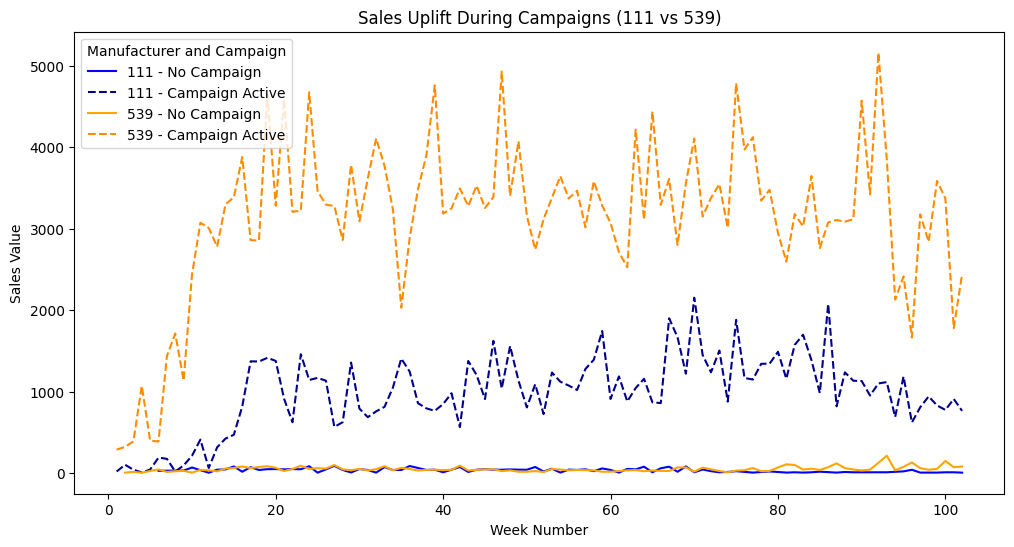

In [ ]:
# Plot Sales Uplift During Campaigns with Separate Lines for Manufacturers
plt.figure(figsize=(12, 6))

# Plot for Manufacturer 111
sns.lineplot(
    data=campaign_sales[(campaign_sales["MANUFACTURER"] == 111) & (campaign_sales["CAMPAIGN_ACTIVE"] == False)],
    x="WEEK_NO",
    y="SALES_VALUE",
    color="blue",
    label="111 - No Campaign",
    linestyle="solid",
)

sns.lineplot(
    data=campaign_sales[(campaign_sales["MANUFACTURER"] == 111) & (campaign_sales["CAMPAIGN_ACTIVE"] == True)],
    x="WEEK_NO",
    y="SALES_VALUE",
    color="darkblue",
    label="111 - Campaign Active",
    linestyle="dashed",
)

# Plot for Manufacturer 539
sns.lineplot(
    data=campaign_sales[(campaign_sales["MANUFACTURER"] == 539) & (campaign_sales["CAMPAIGN_ACTIVE"] == False)],
    x="WEEK_NO",
    y="SALES_VALUE",
    color="orange",
    label="539 - No Campaign",
    linestyle="solid",
)

sns.lineplot(
    data=campaign_sales[(campaign_sales["MANUFACTURER"] == 539) & (campaign_sales["CAMPAIGN_ACTIVE"] == True)],
    x="WEEK_NO",
    y="SALES_VALUE",
    color="darkorange",
    label="539 - Campaign Active",
    linestyle="dashed",
)

# Add titles and labels
plt.title("Sales Uplift During Campaigns (111 vs 539)")
plt.xlabel("Week Number")
plt.ylabel("Sales Value")
plt.legend(title="Manufacturer and Campaign", loc="upper left")
plt.show()


Sales Uplift During Campaigns (Manufacturer 111 vs 539):
    MANUFACTURER  No Campaign  Campaign Active    % Change
0              2     0.259000         0.674349  160.366580
1            111    13.027222         6.773698  -48.003515
2            298     6.062609        18.501166  205.168398
3            469     5.615581         5.039378  -10.260800
4            509     6.267531         6.577997    4.953556
5            539     6.288083         7.945342   26.355548
6           1058    27.138333        10.235676  -62.283330
7           2085          NaN        10.527000         NaN
8           2642          NaN         3.890000         NaN
9           6077          NaN         1.200000         NaN
10          6096     2.860000         5.005000   75.000000


<ipython-input-56-13b127687d53>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


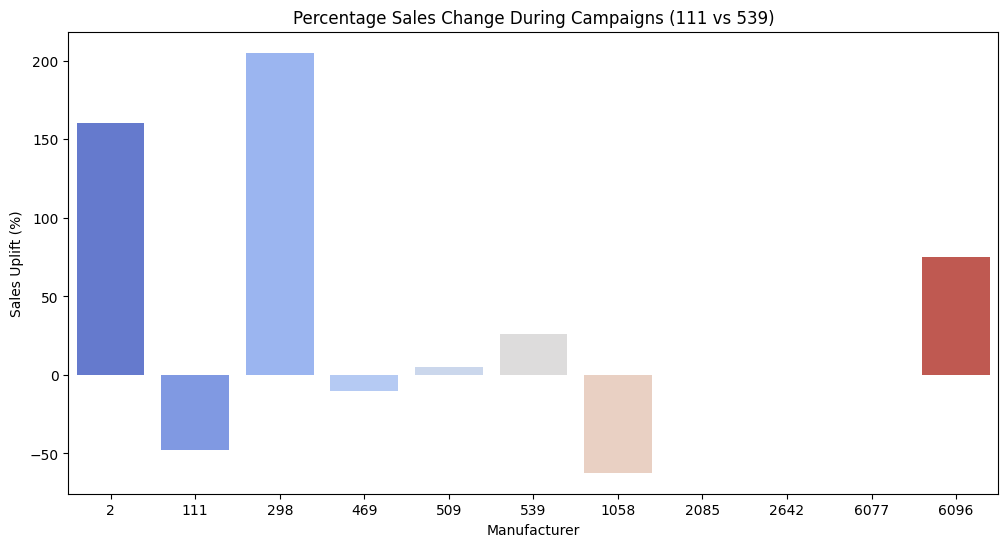

In [ ]:
# Calculate Sales Uplift During Campaigns for Each Manufacturer
sales_uplift = campaign_merged.groupby(["MANUFACTURER", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].mean().reset_index()

# Pivot the data for comparison
sales_uplift_pivot = sales_uplift.pivot(
    index="MANUFACTURER", columns="CAMPAIGN_ACTIVE", values="SALES_VALUE"
).reset_index()
sales_uplift_pivot.columns = ["MANUFACTURER", "No Campaign", "Campaign Active"]

# Calculate the percentage change in sales
sales_uplift_pivot["% Change"] = (
    (sales_uplift_pivot["Campaign Active"] - sales_uplift_pivot["No Campaign"])
    / sales_uplift_pivot["No Campaign"]
) * 100

# Display the Sales Uplift Table
print("Sales Uplift During Campaigns (Manufacturer 111 vs 539):")
print(sales_uplift_pivot)

# Plot Sales Uplift
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_uplift_pivot,
    x="MANUFACTURER",
    y="% Change",
    palette="coolwarm",
)
plt.title("Percentage Sales Change During Campaigns (111 vs 539)")
plt.xlabel("Manufacturer")
plt.ylabel("Sales Uplift (%)")
plt.show()


<ipython-input-64-17fe899de177>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_seasonal_sales["color"] = filtered_seasonal_sales.apply(


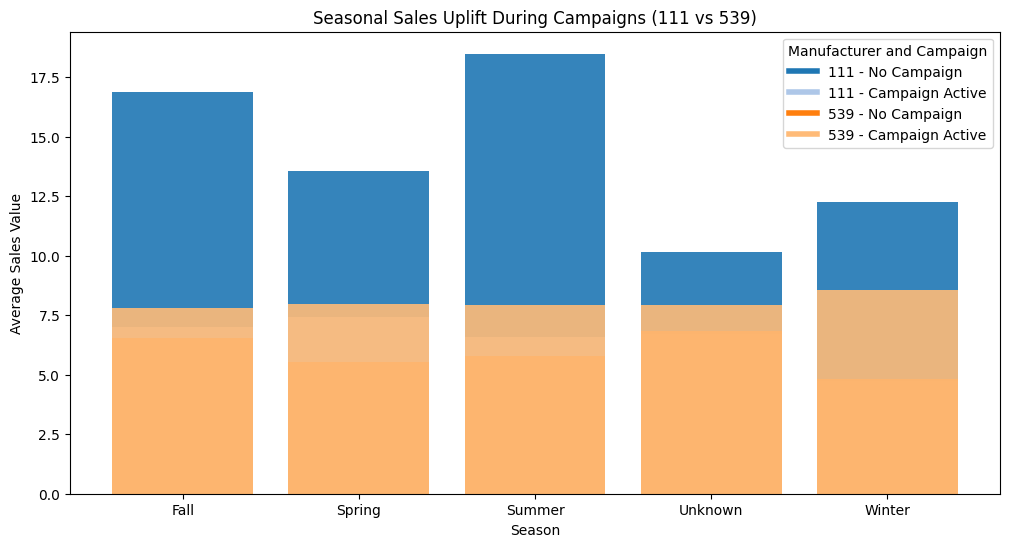

In [ ]:
# Filter data for Manufacturers 111 and 539
filtered_seasonal_sales = seasonal_sales[seasonal_sales["MANUFACTURER"].isin([111, 539])]

# Define a consistent color palette for the bars
palette = {
    (111, False): "#1f77b4",  # Blue for Manufacturer 111 - No Campaign
    (111, True): "#aec7e8",   # Light Blue for Manufacturer 111 - Campaign Active
    (539, False): "#ff7f0e",  # Orange for Manufacturer 539 - No Campaign
    (539, True): "#ffbb78",   # Light Orange for Manufacturer 539 - Campaign Active
}

# Assign colors directly in the data
filtered_seasonal_sales["color"] = filtered_seasonal_sales.apply(
    lambda x: palette.get((x["MANUFACTURER"], x["CAMPAIGN_ACTIVE"])), axis=1
)

# Plot Seasonal Sales Uplift with Consistent Colors
plt.figure(figsize=(12, 6))

# Create bars for each season
for season in filtered_seasonal_sales["SEASON"].unique():
    season_data = filtered_seasonal_sales[filtered_seasonal_sales["SEASON"] == season]
    plt.bar(
        x=season,
        height=season_data["SALES_VALUE"],
        color=season_data["color"],
        label=[f"{row['MANUFACTURER']} - {'Campaign Active' if row['CAMPAIGN_ACTIVE'] else 'No Campaign'}"
               for _, row in season_data.iterrows()],
        alpha=0.9,
    )

# Customizing Legend
handles = [
    plt.Line2D([0], [0], color="#1f77b4", lw=4, label="111 - No Campaign"),
    plt.Line2D([0], [0], color="#aec7e8", lw=4, label="111 - Campaign Active"),
    plt.Line2D([0], [0], color="#ff7f0e", lw=4, label="539 - No Campaign"),
    plt.Line2D([0], [0], color="#ffbb78", lw=4, label="539 - Campaign Active"),
]
plt.legend(handles=handles, title="Manufacturer and Campaign", loc="upper right")

# Add titles and labels
plt.title("Seasonal Sales Uplift During Campaigns (111 vs 539)")
plt.xlabel("Season")
plt.ylabel("Average Sales Value")
plt.show()


In [ ]:
import pandas as pd

# Load the datasets
campaign_desc = pd.read_csv('campaign_desc.csv')
campaign_table = pd.read_csv('campaign_table.csv')
coupon_redempt = pd.read_csv('coupon_redempt.csv')
hh_demographic = pd.read_csv('hh_demographic.csv')
product = pd.read_csv('product.csv')
causal_data = pd.read_csv('causal_data.csv')
transaction_data = pd.read_csv('transaction_data.csv')

# Use chunks for large datasets to reduce memory usage
def load_large_dataset_in_chunks(file_path, chunksize=100000):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        chunks.append(chunk)
    return pd.concat(chunks, axis=0)

# Filtering and merging
# Merge transaction data with product data for product details
transactions_with_products = pd.merge(
    transaction_data,
    product,
    on="PRODUCT_ID",
    how="left"
)

# Filter for cigarettes in the "Drugs GM" department
cigarettes_transactions = transactions_with_products[
    (transactions_with_products["COMMODITY_DESC"] == "CIGARETTES") &
    (transactions_with_products["DEPARTMENT"] == "DRUG GM")
]

# Merge with household demographic data
transactions_with_demo = pd.merge(
    cigarettes_transactions,
    hh_demographic,
    on="household_key",
    how="left"
)

# Merge with coupon redemption data
transactions_with_campaigns = pd.merge(
    transactions_with_demo,
    coupon_redempt,
    on=["household_key", "DAY"],
    how="left"
)

# Merge with campaign table for additional campaign details
transactions_with_campaign_details = pd.merge(
    transactions_with_campaigns,
    campaign_table,
    on=["household_key", "CAMPAIGN"],
    how="left"
)

# Merge with campaign description for campaign timing details
final_master_data = pd.merge(
    transactions_with_campaign_details,
    campaign_desc,
    on="CAMPAIGN",
    how="left"
)

# Save the final merged dataset to a CSV file for inspection
final_master_data.to_csv('final_master_data.csv', index=False)

# Display a summary of the resulting dataset
print(final_master_data.info())
print(final_master_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         12333 non-null  int64  
 1   BASKET_ID             12333 non-null  int64  
 2   DAY                   12333 non-null  int64  
 3   PRODUCT_ID            12333 non-null  int64  
 4   QUANTITY              12333 non-null  int64  
 5   SALES_VALUE           12333 non-null  float64
 6   STORE_ID              12333 non-null  int64  
 7   RETAIL_DISC           12333 non-null  float64
 8   TRANS_TIME            12333 non-null  int64  
 9   WEEK_NO               12333 non-null  int64  
 10  COUPON_DISC           12333 non-null  float64
 11  COUPON_MATCH_DISC     12333 non-null  float64
 12  MANUFACTURER          12333 non-null  int64  
 13  DEPARTMENT            12333 non-null  object 
 14  BRAND                 12333 non-null  object 
 15  COMMODITY_DESC     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         12333 non-null  int64  
 1   BASKET_ID             12333 non-null  int64  
 2   DAY                   12333 non-null  int64  
 3   PRODUCT_ID            12333 non-null  int64  
 4   QUANTITY              12333 non-null  int64  
 5   SALES_VALUE           12333 non-null  float64
 6   STORE_ID              12333 non-null  int64  
 7   RETAIL_DISC           12333 non-null  float64
 8   TRANS_TIME            12333 non-null  int64  
 9   WEEK_NO               12333 non-null  int64  
 10  COUPON_DISC           12333 non-null  float64
 11  COUPON_MATCH_DISC     12333 non-null  float64
 12  MANUFACTURER          12333 non-null  int64  
 13  DEPARTMENT            12333 non-null  object 
 14  BRAND                 12333 non-null  object 
 15  COMMODITY_DESC     

<ipython-input-70-09678cc9799a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarettes_campaign_data["CAMPAIGN_ACTIVE"] = (


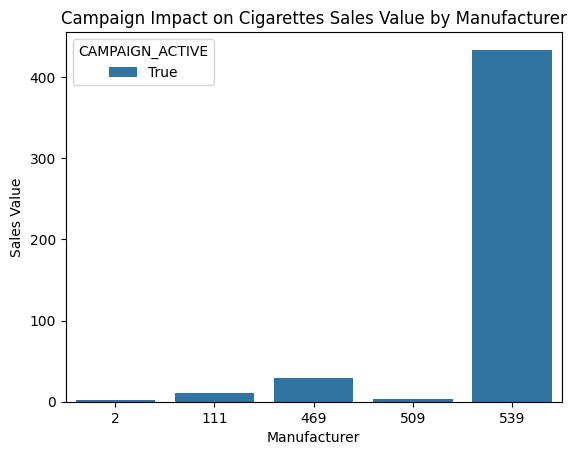

In [ ]:
# Filter for cigarettes in the 'COMMODITY_DESC' column
cigarettes_data = final_master_data[final_master_data["COMMODITY_DESC"] == "CIGARETTES"]

# Check the shape and a quick summary
print(cigarettes_data.info())
print(cigarettes_data.head())

# Filter for transactions with campaign details within cigarettes data
cigarettes_campaign_data = cigarettes_data[~cigarettes_data["CAMPAIGN"].isna()]

# Add a 'CAMPAIGN_ACTIVE' column for cigarettes transactions
cigarettes_campaign_data["CAMPAIGN_ACTIVE"] = (
    (cigarettes_campaign_data["DAY"] >= cigarettes_campaign_data["START_DAY"]) &
    (cigarettes_campaign_data["DAY"] <= cigarettes_campaign_data["END_DAY"])
)

# Group by Manufacturer and Campaign Active Status
cigarettes_summary = cigarettes_campaign_data.groupby(
    ["MANUFACTURER", "CAMPAIGN_ACTIVE"]
).agg({
    "SALES_VALUE": "sum",
    "QUANTITY": "sum"
}).reset_index()

print(cigarettes_summary)

# Save the filtered data for further analysis
cigarettes_campaign_data.to_csv('cigarettes_campaign_filtered.csv', index=False)

# Visualization Example: Campaign Impact for Cigarettes
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data=cigarettes_summary,
    x="MANUFACTURER",
    y="SALES_VALUE",
    hue="CAMPAIGN_ACTIVE"
)
plt.title("Campaign Impact on Cigarettes Sales Value by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Sales Value")
plt.show()


Top 5 Competitors by Sales:
MANUFACTURER
539    62357.73
111    22873.28
509     5072.13
469     3473.81
298     1718.19
Name: SALES_VALUE, dtype: float64
Random Forest Performance:
RMSE: 8.723372239144947
R² Score: 0.18062710087984002


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

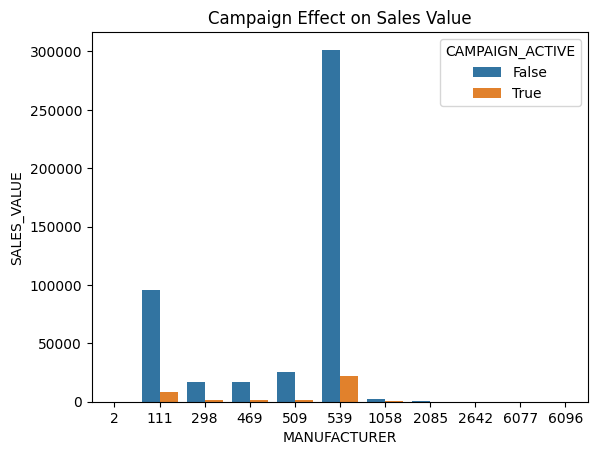

<ipython-input-72-f52297c40055>:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sales = cigarettes_data.groupby(["SEASON", "MANUFACTURER"])["SALES_VALUE"].mean().reset_index()


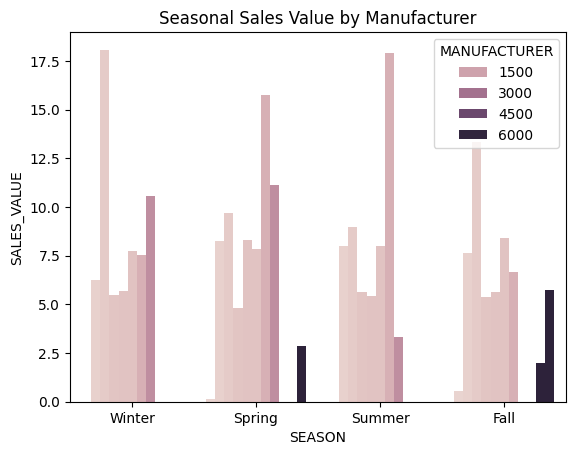

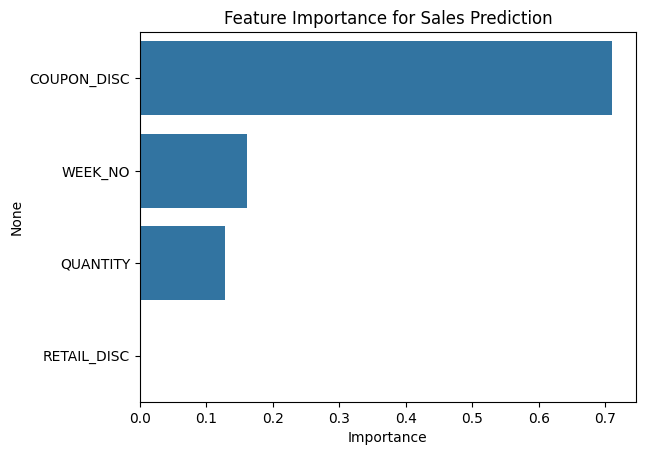

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Filter for Cigarettes Commodity
cigarettes_data = transaction_data.merge(product_data, on="PRODUCT_ID", how="left")
cigarettes_data = cigarettes_data[cigarettes_data["COMMODITY_DESC"] == "CIGARETTES"]

# Check for missing columns in campaign_desc and campaign_table
missing_columns = {"START_DAY", "END_DAY"} - set(campaign_desc.columns)
if missing_columns:
    print(f"Missing columns in campaign_desc: {missing_columns}")
    campaign_desc = campaign_desc.assign(START_DAY=np.nan, END_DAY=np.nan)

# Merge campaign details into transaction data
cigarettes_campaign_data = cigarettes_data.merge(campaign_table, on="household_key", how="left")
cigarettes_campaign_data = cigarettes_campaign_data.merge(campaign_desc, on="CAMPAIGN", how="left")

# Handle missing or invalid campaign data
cigarettes_campaign_data["START_DAY"] = cigarettes_campaign_data["START_DAY"].fillna(0)
cigarettes_campaign_data["END_DAY"] = cigarettes_campaign_data["END_DAY"].fillna(0)
cigarettes_campaign_data["CAMPAIGN_ACTIVE"] = (
    (cigarettes_campaign_data["DAY"] >= cigarettes_campaign_data["START_DAY"]) &
    (cigarettes_campaign_data["DAY"] <= cigarettes_campaign_data["END_DAY"])
)

# 1. Predict the sales or market share of competitors
sales_summary = cigarettes_data.groupby("MANUFACTURER")["SALES_VALUE"].sum()
sales_summary = sales_summary.sort_values(ascending=False).head(5)
print("Top 5 Competitors by Sales:")
print(sales_summary)

# Predict sales using Random Forest
X = cigarettes_data[["QUANTITY", "RETAIL_DISC", "COUPON_DISC", "WEEK_NO"]]
y = cigarettes_data["SALES_VALUE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# 2. Forecast competitors’ pricing strategies
price_111 = cigarettes_data[cigarettes_data["MANUFACTURER"] == 111].groupby("WEEK_NO")["SALES_VALUE"].mean()
price_539 = cigarettes_data[cigarettes_data["MANUFACTURER"] == 539].groupby("WEEK_NO")["SALES_VALUE"].mean()

sarimax_model_111 = SARIMAX(price_111, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_111 = sarimax_model_111.fit()

sarimax_model_539 = SARIMAX(price_539, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_539 = sarimax_model_539.fit()

forecast_111 = sarimax_results_111.get_forecast(steps=12).summary_frame()
forecast_539 = sarimax_results_539.get_forecast(steps=12).summary_frame()

# 3. Analyze the occurrence of competitors’ marketing campaigns
campaign_effect = cigarettes_campaign_data.groupby(["MANUFACTURER", "CAMPAIGN_ACTIVE"])["SALES_VALUE"].sum().reset_index()
sns.barplot(data=campaign_effect, x="MANUFACTURER", y="SALES_VALUE", hue="CAMPAIGN_ACTIVE")
plt.title("Campaign Effect on Sales Value")
plt.show()

# 4. Seasonal analysis
cigarettes_data["SEASON"] = pd.cut(
    cigarettes_data["WEEK_NO"], bins=[0, 13, 26, 39, 52], labels=["Winter", "Spring", "Summer", "Fall"]
)

seasonal_sales = cigarettes_data.groupby(["SEASON", "MANUFACTURER"])["SALES_VALUE"].mean().reset_index()
sns.barplot(data=seasonal_sales, x="SEASON", y="SALES_VALUE", hue="MANUFACTURER")
plt.title("Seasonal Sales Value by Manufacturer")
plt.show()

# 5. Interpret model and implications
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)
plt.title("Feature Importance for Sales Prediction")
plt.show()


Top 5 Competitors by Sales:
MANUFACTURER
539    323157.72
111    103660.69
509     26839.39
298     18548.10
469     18173.32
Name: SALES_VALUE, dtype: float64
Random Forest Performance:
RMSE: 7.556812771627582
R² Score: 0.2589667095987307
XGBoost RMSE: 7.557127906550771


100%|===================| 13024/13042 [02:29<00:00]       

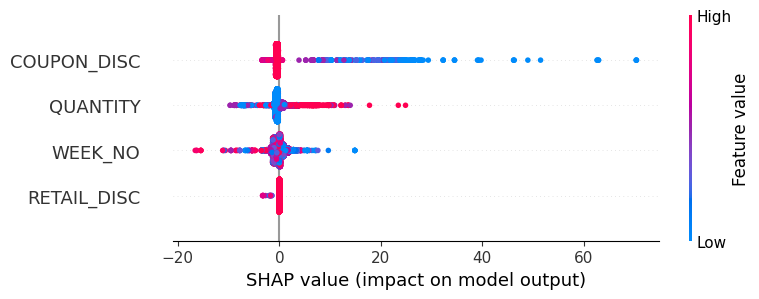

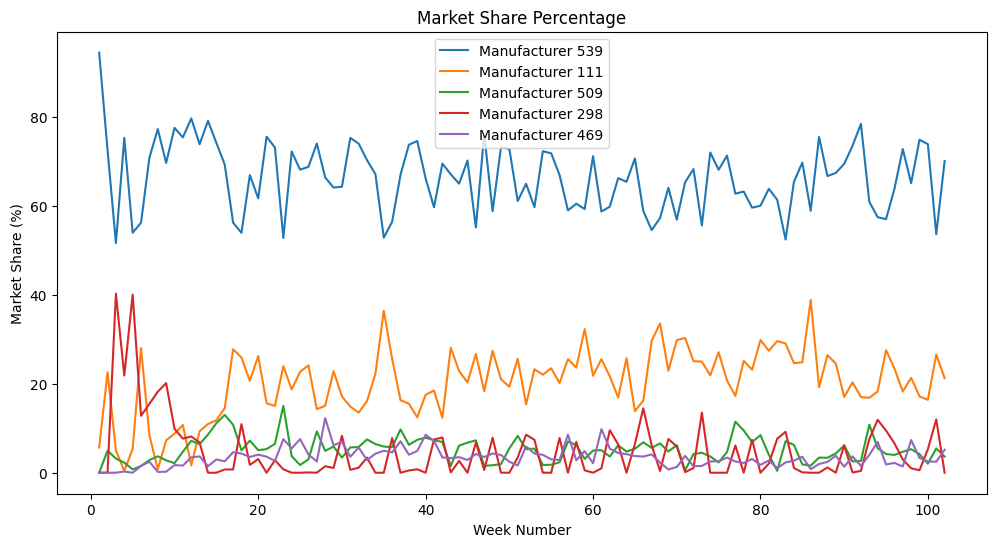

CAMPAIGN_ACTIVE column created successfully: True


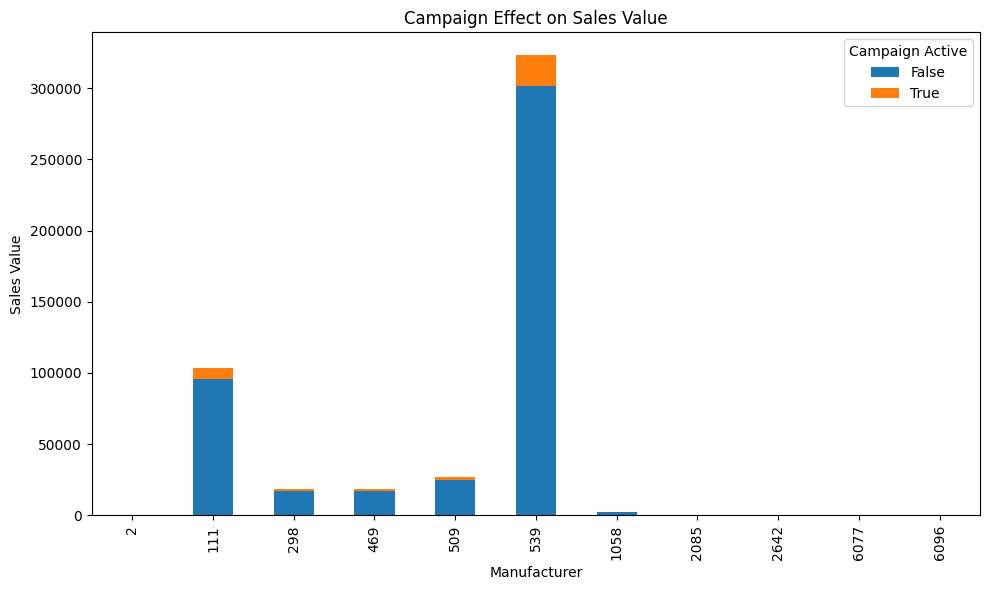

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap

# Load datasets
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
coupon = pd.read_csv("coupon.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product = pd.read_csv("product.csv")
transaction_data = pd.read_csv("transaction_data.csv")

# Filter data for Cigarettes commodity
transaction_data = transaction_data.merge(product, on='PRODUCT_ID', how='left')
filtered_data = transaction_data[transaction_data['COMMODITY_DESC'] == 'CIGARETTES']

# Merge campaign data
campaigns = campaign_table.merge(campaign_desc, on="CAMPAIGN", how="left")
merged_data = filtered_data.merge(campaigns, on="household_key", how="left")

# Analysis for Top Competitors
top_competitors = merged_data.groupby('MANUFACTURER')['SALES_VALUE'].sum().sort_values(ascending=False).head(5)
print("Top 5 Competitors by Sales:")
print(top_competitors)

# Machine Learning for Sales Prediction
features = ['QUANTITY', 'RETAIL_DISC', 'COUPON_DISC', 'WEEK_NO']
merged_data = merged_data.dropna(subset=features + ['SALES_VALUE'])
X = merged_data[features]
y = merged_data['SALES_VALUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# SHAP Analysis
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# Market Share Analysis
def calculate_market_share(data, manufacturers):
    weekly_sales = data.groupby(['WEEK_NO', 'MANUFACTURER'])['SALES_VALUE'].sum().unstack(fill_value=0)
    weekly_sales = weekly_sales[manufacturers]
    total_sales = weekly_sales.sum(axis=1)
    market_share = weekly_sales.divide(total_sales, axis=0) * 100
    return market_share

top_manufacturers = top_competitors.index.tolist()
market_share = calculate_market_share(merged_data, top_manufacturers)

# Plot Market Share
plt.figure(figsize=(12, 6))
for manufacturer in market_share.columns:
    plt.plot(market_share.index, market_share[manufacturer], label=f"Manufacturer {manufacturer}")
plt.title("Market Share Percentage")
plt.xlabel("Week Number")
plt.ylabel("Market Share (%)")
plt.legend()
plt.show()

# Ensure START_DAY and END_DAY are numeric and not null
merged_data['START_DAY'] = pd.to_numeric(merged_data['START_DAY'], errors='coerce')
merged_data['END_DAY'] = pd.to_numeric(merged_data['END_DAY'], errors='coerce')

# Create CAMPAIGN_ACTIVE column
merged_data['CAMPAIGN_ACTIVE'] = merged_data.apply(
    lambda row: row['START_DAY'] <= row['DAY'] <= row['END_DAY'] if not pd.isnull(row['START_DAY']) and not pd.isnull(row['END_DAY']) else False,
    axis=1
)

# Check if CAMPAIGN_ACTIVE column exists and is properly created
print("CAMPAIGN_ACTIVE column created successfully:", 'CAMPAIGN_ACTIVE' in merged_data.columns)

# Campaign Analysis
campaign_effect = merged_data.groupby(['MANUFACTURER', 'CAMPAIGN_ACTIVE'])['SALES_VALUE'].sum().unstack(fill_value=0)
campaign_effect.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Campaign Effect on Sales Value")
plt.ylabel("Sales Value")
plt.xlabel("Manufacturer")
plt.legend(title="Campaign Active")
plt.tight_layout()
plt.show()


<ipython-input-13-f9589d7ffd35>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cigarettes_data["PRICE"].fillna(method="ffill", inplace=True)
<ipython-input-13-f9589d7ffd35>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cigarettes_data["PRICE"].fillna(method="ffill", inplace=True)
<ipython-input-13-f9589d7ffd35>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpla

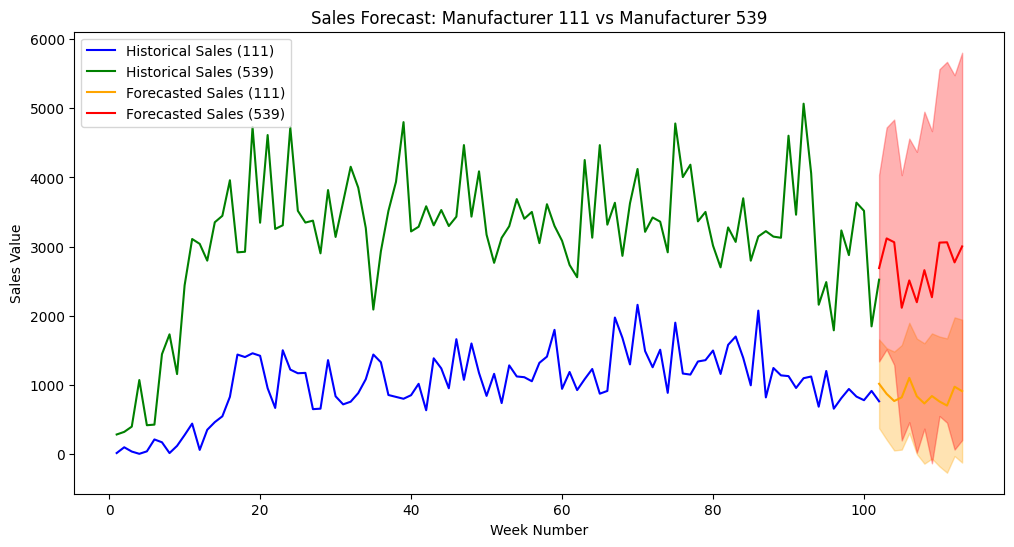

Cross-Elasticity Coefficients (111):
PRICE               52.958435
LAG_PRICE_539       -1.721919
ar.L1               -0.222111
ma.L1               -0.523542
ar.S.L12             0.023441
ma.S.L12            -0.968632
sigma2           98105.584559
dtype: float64

Cross-Elasticity Coefficients (539):
PRICE               240.858336
LAG_PRICE_111        -1.191511
ar.L1                 0.229084
ma.L1                -0.587065
ar.S.L12             -0.006882
ma.S.L12             -0.892257
sigma2           456974.150803
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the datasets
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
coupon_redempt = pd.read_csv("coupon_redempt.csv")
coupon = pd.read_csv("coupon.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
product = pd.read_csv("product.csv")
transaction_data = pd.read_csv("transaction_data.csv")

# Merge datasets
merged_data = transaction_data.merge(product, on="PRODUCT_ID", how="left")
merged_data = merged_data.merge(campaign_table, on="household_key", how="left")
merged_data = merged_data.merge(campaign_desc, on="CAMPAIGN", how="left")

# Filter for cigarettes category
cigarettes_data = merged_data[merged_data["COMMODITY_DESC"] == "CIGARETTES"].copy()

# Calculate price per unit and handle missing or zero quantities
cigarettes_data["PRICE"] = np.where(
    cigarettes_data["QUANTITY"] > 0,
    cigarettes_data["SALES_VALUE"] / cigarettes_data["QUANTITY"],
    np.nan
)

# Fill missing or infinite values in PRICE
cigarettes_data["PRICE"].fillna(method="ffill", inplace=True)
cigarettes_data["PRICE"].fillna(method="bfill", inplace=True)

# Aggregated sales and prices
manufacturer_sales = cigarettes_data.groupby(["WEEK_NO", "MANUFACTURER"]).agg(
    {"SALES_VALUE": "sum", "PRICE": "mean"}
).reset_index()

# Focus on Manufacturers 111 and 539
top_competitors = [111, 539]
filtered_data = manufacturer_sales[manufacturer_sales["MANUFACTURER"].isin(top_competitors)]

# Prepare data for SARIMAX
manufacturer_111 = filtered_data[filtered_data["MANUFACTURER"] == 111].set_index("WEEK_NO")
manufacturer_539 = filtered_data[filtered_data["MANUFACTURER"] == 539].set_index("WEEK_NO")

# Create lagged price feature for Manufacturer 539
manufacturer_111["LAG_PRICE_539"] = manufacturer_539["PRICE"].shift(1)

# Handle missing values in LAG_PRICE_539
manufacturer_111["LAG_PRICE_539"].fillna(method="ffill", inplace=True)
manufacturer_111["LAG_PRICE_539"].fillna(method="bfill", inplace=True)

# Train SARIMAX Model for Manufacturer 111
sarimax_model_111 = SARIMAX(
    manufacturer_111["SALES_VALUE"],
    exog=manufacturer_111[["PRICE", "LAG_PRICE_539"]],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
sarimax_result_111 = sarimax_model_111.fit(disp=False)

# Train SARIMAX Model for Manufacturer 539
manufacturer_539["LAG_PRICE_111"] = manufacturer_111["PRICE"].shift(1)
manufacturer_539["LAG_PRICE_111"].fillna(method="ffill", inplace=True)
manufacturer_539["LAG_PRICE_111"].fillna(method="bfill", inplace=True)

sarimax_model_539 = SARIMAX(
    manufacturer_539["SALES_VALUE"],
    exog=manufacturer_539[["PRICE", "LAG_PRICE_111"]],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
sarimax_result_539 = sarimax_model_539.fit(disp=False)

# Forecast
forecast_111 = sarimax_result_111.get_forecast(steps=12, exog=manufacturer_111[["PRICE", "LAG_PRICE_539"]][-12:])
forecast_539 = sarimax_result_539.get_forecast(steps=12, exog=manufacturer_539[["PRICE", "LAG_PRICE_111"]][-12:])

forecast_mean_111 = forecast_111.predicted_mean
forecast_mean_539 = forecast_539.predicted_mean
forecast_ci_111 = forecast_111.conf_int()
forecast_ci_539 = forecast_539.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(manufacturer_111.index, manufacturer_111["SALES_VALUE"], label="Historical Sales (111)", color="blue")
plt.plot(
    manufacturer_539.index, manufacturer_539["SALES_VALUE"], label="Historical Sales (539)", color="green"
)
plt.plot(
    np.arange(len(manufacturer_111), len(manufacturer_111) + 12),
    forecast_mean_111,
    label="Forecasted Sales (111)",
    color="orange"
)
plt.plot(
    np.arange(len(manufacturer_539), len(manufacturer_539) + 12),
    forecast_mean_539,
    label="Forecasted Sales (539)",
    color="red"
)
plt.fill_between(
    np.arange(len(manufacturer_111), len(manufacturer_111) + 12),
    forecast_ci_111.iloc[:, 0],
    forecast_ci_111.iloc[:, 1],
    color="orange",
    alpha=0.3
)
plt.fill_between(
    np.arange(len(manufacturer_539), len(manufacturer_539) + 12),
    forecast_ci_539.iloc[:, 0],
    forecast_ci_539.iloc[:, 1],
    color="red",
    alpha=0.3
)
plt.legend()
plt.title("Sales Forecast: Manufacturer 111 vs Manufacturer 539")
plt.xlabel("Week Number")
plt.ylabel("Sales Value")
plt.show()

# Print Cross-Elasticity Coefficients
print("Cross-Elasticity Coefficients (111):")
print(sarimax_result_111.params)

print("\nCross-Elasticity Coefficients (539):")
print(sarimax_result_539.params)


RMSE: 0.46240098645887034
R² Score: 0.9972254158681881


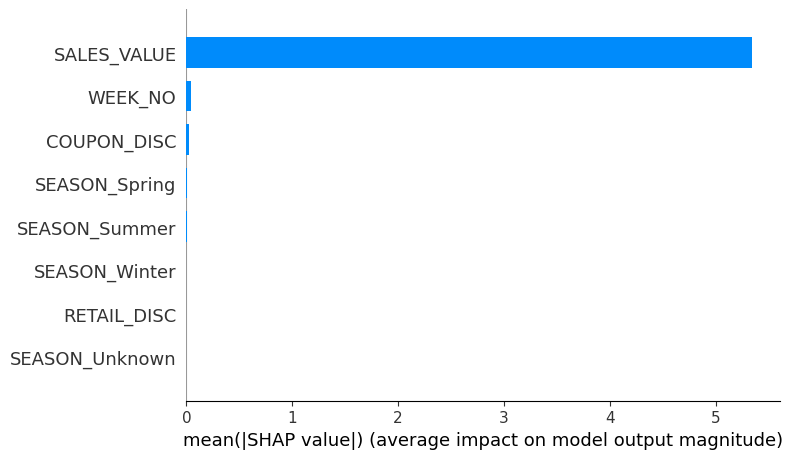

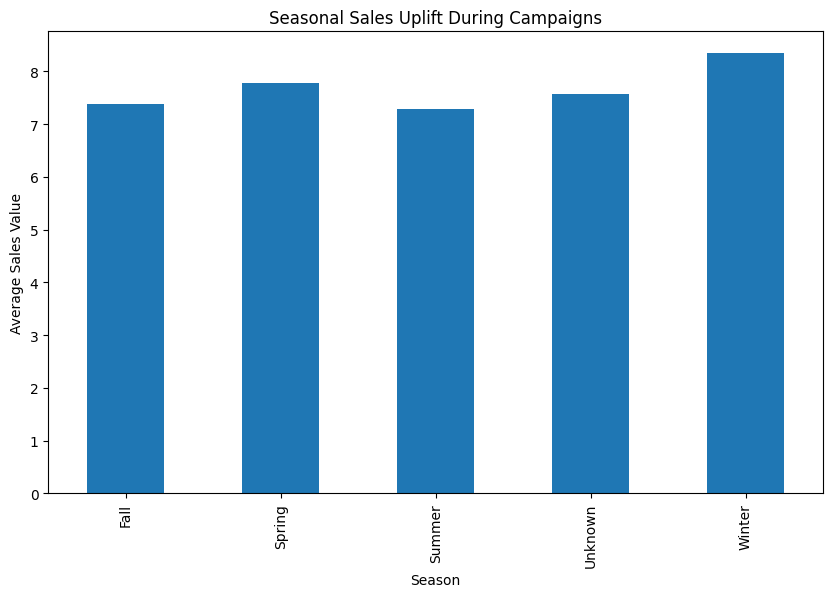

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Load raw datasets
transaction_data = pd.read_csv("transaction_data.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")
campaign_table = pd.read_csv("campaign_table.csv")
product = pd.read_csv("product.csv")

# Merge datasets
merged_data = pd.merge(transaction_data, product, on="PRODUCT_ID", how="left")
merged_data = pd.merge(merged_data, campaign_table, on="household_key", how="left")
merged_data = pd.merge(merged_data, campaign_desc, on="CAMPAIGN", how="left")

# Filter for "CIGARETTES" only
cigarettes_data = merged_data[merged_data["COMMODITY_DESC"] == "CIGARETTES"].copy()

# Add a column for seasonal categorization
def categorize_season(day):
    if 1 <= day <= 90:
        return "Winter"
    elif 91 <= day <= 181:
        return "Spring"
    elif 182 <= day <= 273:
        return "Summer"
    elif 274 <= day <= 365:
        return "Fall"
    else:
        return "Unknown"

# Safely apply the season categorization
cigarettes_data["SEASON"] = cigarettes_data["DAY"].fillna(0).astype(int).apply(categorize_season)

# Ensure "SEASON" is in the dataset
if "SEASON" not in cigarettes_data.columns:
    print("SEASON column is missing. Ensure that the categorization logic is applied properly.")

# Prepare data for modeling
X = cigarettes_data[["SALES_VALUE", "COUPON_DISC", "RETAIL_DISC", "WEEK_NO", "SEASON"]].copy()
X = pd.get_dummies(X, columns=["SEASON"], drop_first=True)  # Convert "SEASON" to dummy variables
y = cigarettes_data["SALES_VALUE"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Feature importance analysis
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Seasonal sales uplift visualization
seasonal_sales = cigarettes_data.groupby(["SEASON"])["SALES_VALUE"].mean()
seasonal_sales.plot(kind="bar", figsize=(10, 6))
plt.title("Seasonal Sales Uplift During Campaigns")
plt.xlabel("Season")
plt.ylabel("Average Sales Value")
plt.show()


<ipython-input-19-2bcbe1c1b974>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarettes_data["SEASON"] = cigarettes_data["DAY"].apply(categorize_season)


RMSE: 7.8084473935977545
R² Score: 0.20135408297537793


 99%|===================| 12664/12808 [01:56<00:01]       

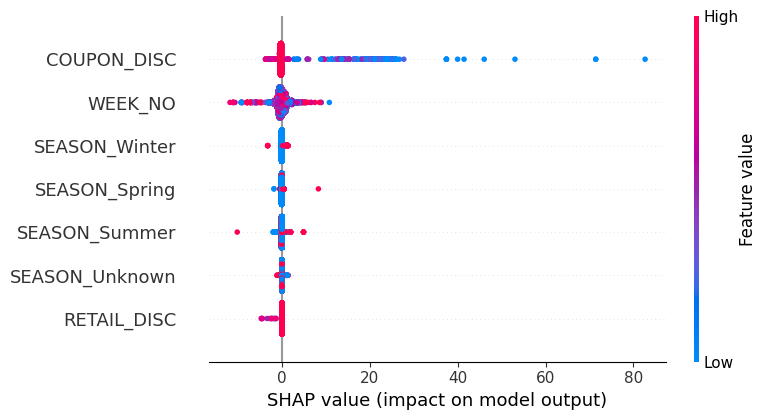

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the filtered dataset
cigarettes_data = pd.read_csv("filtered_cigarettes_data.csv")

# Ensure no missing values
cigarettes_data = cigarettes_data.dropna()

# Define a function to categorize seasons
def categorize_season(day):
    if day in range(1, 80) or day in range(356, 366):  # Winter
        return "Winter"
    elif day in range(80, 172):  # Spring
        return "Spring"
    elif day in range(172, 266):  # Summer
        return "Summer"
    elif day in range(266, 356):  # Fall
        return "Fall"
    else:
        return "Unknown"

# Create SEASON column
cigarettes_data["SEASON"] = cigarettes_data["DAY"].apply(categorize_season)

# Exclude SALES_VALUE as a feature
X = cigarettes_data[["COUPON_DISC", "RETAIL_DISC", "WEEK_NO", "SEASON"]]
X = pd.get_dummies(X, columns=["SEASON"], drop_first=True)  # Encode season
y = cigarettes_data["SALES_VALUE"]

# Ensure all data in X is numeric
X = X.astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# SHAP analysis for feature importance
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Identify duplicate column names
duplicate_cols = cigarettes_data.columns[cigarettes_data.columns.duplicated()]
if len(duplicate_cols) > 0:
    print("Duplicate columns detected:", duplicate_cols)

# Drop duplicate columns
cigarettes_data = cigarettes_data.loc[:, ~cigarettes_data.columns.duplicated()]

# Check for non-numeric columns again
non_numeric_cols = cigarettes_data.select_dtypes(exclude=["number"]).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns still present after removing duplicates:", non_numeric_cols)
    for col in non_numeric_cols:
        try:
            cigarettes_data[col] = pd.to_numeric(cigarettes_data[col], errors="coerce")
        except Exception as e:
            print(f"Error converting column {col} to numeric:", e)

# Drop rows with NaNs created during numeric conversion
cigarettes_data = cigarettes_data.dropna()

# Feature engineering: Add lagged features
if "SALES_VALUE" in cigarettes_data.columns:
    cigarettes_data["LAG_1"] = cigarettes_data["SALES_VALUE"].shift(1)
    cigarettes_data["LAG_2"] = cigarettes_data["SALES_VALUE"].shift(2)
    cigarettes_data["LAG_3"] = cigarettes_data["SALES_VALUE"].shift(3)

# Drop rows with NaNs after adding lagged features
cigarettes_data = cigarettes_data.dropna()

# Prepare dataset
X = cigarettes_data.drop(["SALES_VALUE"], axis=1)
y = cigarettes_data["SALES_VALUE"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Fine-tuned Model RMSE:", rmse)
print("Fine-tuned Model R² Score:", r2)

# SHAP analysis
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)


Duplicate columns detected: Index(['SEASON_Spring', 'SEASON_Summer', 'SEASON_Winter', 'SEASON_Spring',
       'SEASON_Summer', 'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer',
       'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Winter',
       'SEASON_Spring', 'SEASON_Summer', 'SEASON_Winter', 'SEASON_Spring',
       'SEASON_Summer', 'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer',
       'SEASON_Winter'],
      dtype='object')
Non-numeric columns still present after removing duplicates: Index(['SEASON_Spring', 'SEASON_Summer', 'SEASON_Unknown', 'SEASON_Winter',
       'DESCRIPTION_CAMPAIGN_TypeB', 'DESCRIPTION_CAMPAIGN_TypeC',
       'DESCRIPTION_DESC_TypeB', 'DESCRIPTION_DESC_TypeC'],
      dtype='object')


<ipython-input-33-a0111502d610>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cigarettes_data[col] = pd.to_numeric(cigarettes_data[col], errors="coerce")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
